In [1]:
import pandas as pd 
import datetime as dt 
import os 
import openmeteo_requests
import requests_cache

In [2]:
os.getcwd()

'c:\\Users\\youss\\Documents\\University of Calgary\\DATA 601\\Group Project\\UofC601L02_Project\\notebooks'

In [3]:
file_path = os.path.join(r"c:\\Users\\youss\\Documents\\University of Calgary\\DATA 601\\Group Project\\UofC601L02_Project\\data", 'Total_Data_10Y_Top23.csv')
us_avaiation_data = pd.read_csv(file_path)

In [4]:
us_avaiation_data['FL_DATE'] = pd.to_datetime(us_avaiation_data['FL_DATE'])

In [5]:
us_avaiation_data['TOTAL_DELAY'] = us_avaiation_data['WEATHER_DELAY'] + us_avaiation_data['LATE_AIRCRAFT_DELAY'] + us_avaiation_data['CARRIER_DELAY'] + us_avaiation_data['NAS_DELAY']

In [6]:
us_avaiation_data.head(-5)

FL_DATE OP_UNIQUE_CARRIER TAIL_NUM  ORIGIN_AIRPORT_SEQ_ID  \
0        2014-07-01                AA   N002AA                1105703   
1        2014-07-01                AA   N002AA                1129803   
2        2014-07-01                AA   N004AA                1039705   
3        2014-07-01                AA   N004AA                1129803   
4        2014-07-01                AA   N004AA                1129803   
...             ...               ...      ...                    ...   
12926546 2018-12-31                YX   N748YX                1161802   
12926547 2018-12-31                YX   N858RW                1161802   
12926548 2018-12-31                YX   N858RW                1449202   
12926549 2018-12-31                YX   N863RW                1129806   
12926550 2018-12-31                YX   N863RW                1393007   

          ORIGIN_CITY_MARKET_ID ORIGIN       ORIGIN_CITY_NAME  \
0                         31057    CLT          Charlotte, NC   
1                         30194    DFW  Dallas/Fort Worth, TX   
2                         30397    ATL            Atlanta, GA   
3                         30194    DFW  Dallas/Fort Worth, TX   
4                         30194    DFW  Dallas/Fort Worth, TX   
...                         ...    ...                    ...   
12926546                  31703    EWR             Newark, NJ   
12926547                  31703    EWR             Newark, NJ   
12926548                  34492    RDU     Raleigh/Durham, NC   
12926549                  30194    DFW  Dallas/Fort Worth, TX   
12926550                  30977    ORD            Chicago, IL   

          DEST_AIRPORT_SEQ_ID  DEST_CITY_MARKET_ID DEST  ... ARR_TIME  \
0                     1129803                30194  DFW  ...   1214.0   
1                     1105703                31057  CLT  ...    945.0   
2                     1129803                30194  DFW  ...   1341.0   
3                     1039705                30397  ATL  ...   1159.0   
4                     1039705                30397  ATL  ...   2317.0   
...                       ...                  ...  ...  ...      ...   
12926546              1129806                30194  DFW  ...   1934.0   
12926547              1449202                34492  RDU  ...   1243.0   
12926548              1393007                30977  ORD  ...   1450.0   
12926549              1161802                31703  EWR  ...   1758.0   
12926550              1129806                30194  DFW  ...   1325.0   

          ARR_DELAY  CANCELLED  CANCELLATION_CODE  CARRIER_DELAY  \
0               9.0        0.0                NaN            NaN   
1               0.0        0.0                NaN            NaN   
2              -9.0        0.0                NaN            NaN   
3               4.0        0.0                NaN            NaN   
4               2.0        0.0                NaN            NaN   
...             ...        ...                ...            ...   
12926546        1.0        0.0                NaN            NaN   
12926547      -10.0        0.0                NaN            NaN   
12926548       -5.0        0.0                NaN            NaN   
12926549      -13.0        0.0                NaN            NaN   
12926550       25.0        0.0                NaN            0.0   

          WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY LATE_AIRCRAFT_DELAY  \
0                   NaN        NaN             NaN                 NaN   
1                   NaN        NaN             NaN                 NaN   
2                   NaN        NaN             NaN                 NaN   
3                   NaN        NaN             NaN                 NaN   
4                   NaN        NaN             NaN                 NaN   
...                 ...        ...             ...                 ...   
12926546            NaN        NaN             NaN                 NaN   
12926547            NaN        NaN             NaN                 N

In [7]:
weather_cancelled = us_avaiation_data
weather_cancelled['FL_YEAR'] = weather_cancelled['FL_DATE'].dt.year
weather_cancelled['FL_MONTH'] =  weather_cancelled['FL_DATE'].dt.month

In [165]:
weather_cancelled

FL_DATE OP_UNIQUE_CARRIER TAIL_NUM  ORIGIN_AIRPORT_SEQ_ID  \
4345     2014-07-02                AS   N413AS                1161802   
4523     2014-07-02                B6   N284JB                1247802   
4555     2014-07-02                B6   N547JB                1247802   
4556     2014-07-02                B6   N547JB                1474703   
4564     2014-07-02                B6   N586JB                1483103   
...             ...               ...      ...                    ...   
12911424 2018-12-27                YV   N954LR                1219102   
12911886 2018-12-28                AA   N579UW                1105703   
12911905 2018-12-28                AA   N584UW                1288903   
12912164 2018-12-28                AA   N879NN                1349505   
12914765 2018-12-28                WN   N461WN                1349505   

          ORIGIN_CITY_MARKET_ID ORIGIN ORIGIN_CITY_NAME  DEST_AIRPORT_SEQ_ID  \
4345                      31703    EWR       Newark, NJ              1474703   
4523                      31703    JFK     New York, NY              1393003   
4555                      31703    JFK     New York, NY              1474703   
4556                      30559    SEA      Seattle, WA              1247802   
4564                      32457    SJC     San Jose, CA              1247802   
...                         ...    ...              ...                  ...   
12911424                  31453    HOU      Houston, TX              1129806   
12911886                  31057    CLT    Charlotte, NC              1288903   
12911905                  32211    LAS    Las Vegas, NV              1105703   
12912164                  33495    MSY  New Orleans, LA              1129806   
12914765                  33495    MSY  New Orleans, LA              1219102   

          DEST_CITY_MARKET_ID DEST  ... ARR_DELAY  CANCELLED  \
4345                    30559  SEA  ...       NaN        1.0   
4523                    30977  ORD  ...       NaN        1.0   
4555                    30559  SEA  ...       NaN        1.0   
4556                    31703  JFK  ...       NaN        1.0   
4564                    31703  JFK  ...       NaN        1.0   
...                       ...  ...  ...       ...        ...   
12911424                30194  DFW  ...       NaN        1.0   
12911886                32211  LAS  ...       NaN        1.0   
12911905                31057  CLT  ...       NaN        1.0   
12912164                30194  DFW  ...       NaN        1.0   
12914765                31453  HOU  ...       NaN        1.0   

          CANCELLATION_CODE  CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  \
4345                      B            NaN            NaN        NaN   
4523                      B            NaN            NaN        NaN   
4555                      B            NaN            NaN        NaN   
4556                      B            NaN            NaN        NaN   
4564                      B            NaN            NaN        NaN   
...                     ...            ...            ...        ...   
12911424                  B            NaN            NaN        NaN   
12911886                  B            NaN            NaN        NaN   
12911905                  B            NaN            NaN        NaN   
12912164                  B            NaN            NaN        NaN   
12914765                  B            NaN            NaN        NaN   

          SECURITY_DELAY  LATE_AIRCRAFT_DELAY FL_YEAR  FL_MONTH  
4345                 NaN                  NaN    2014         7  
4523                 NaN                  NaN    2014         7  
4555                 NaN                  NaN    2014         7  
4556                 NaN                  NaN    2014         7  
4564                 NaN                  NaN    2014         7  
...                  ...                  ...     ...       ...  
12911424             NaN                  NaN    2018        12  
12911886    

In [166]:
weather_cancelled = weather_cancelled[['FL_DATE','FL_YEAR','FL_MONTH','OP_UNIQUE_CARRIER', 'TAIL_NUM', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY' ]]
cancelled_counts = pd.DataFrame(weather_cancelled.groupby(by = ['FL_DATE', 'ORIGIN'])['CANCELLED'].sum()).reset_index()
cancelled_counts = cancelled_counts.rename(columns={'CANCELLED':"CANCELLED_DUE_TO_WEATHER_COUNTS",'ORIGIN':"ORIGIN_AIRPORT"})

In [169]:
cancelled_counts

FL_DATE ORIGIN_AIRPORT  CANCELLED_DUE_TO_WEATHER_COUNTS
0     2014-07-02            DFW                              1.0
1     2014-07-02            EWR                              4.0
2     2014-07-02            JFK                              6.0
3     2014-07-02            LAS                              1.0
4     2014-07-02            MCO                              2.0
...          ...            ...                              ...
19458 2024-06-30            PHX                              1.0
19459 2024-06-30            RDU                              4.0
19460 2024-06-30            SEA                              1.0
19461 2024-06-30            SFO                              3.0
19462 2024-06-30            SMF                              1.0

[19463 rows x 3 columns]

In [8]:
weather_delay = us_avaiation_data[us_avaiation_data['CANCELLATION_CODE'].isna()]
weather_delay['FL_MONTH'] = weather_delay['FL_DATE'].dt.month
weather_delay['FL_YEAR'] = weather_delay['FL_DATE'].dt.year
weather_delay['TOTAL_DELAY'] = weather_delay['TOTAL_DELAY'].fillna(0.0)


C:\Users\youss\AppData\Local\Temp\ipykernel_5508\234183179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_delay['FL_MONTH'] = weather_delay['FL_DATE'].dt.month
C:\Users\youss\AppData\Local\Temp\ipykernel_5508\234183179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_delay['FL_YEAR'] = weather_delay['FL_DATE'].dt.year
C:\Users\youss\AppData\Local\Temp\ipykernel_5508\234183179.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [9]:
weather_delay = weather_delay[['FL_YEAR', 'FL_MONTH', 'FL_DATE', 'OP_UNIQUE_CARRIER', 'TAIL_NUM', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'TOTAL_DELAY']]
weather_delay = weather_delay.dropna(subset=['ARR_TIME'])
weather_delay['ARR_TIME'].isna().sum()


In [11]:
def convert_float_to_time_str(x):
    time_str = f"{int(x):04d}"  

    if len(time_str) != 4:
        return None

    hour = int(time_str[:2])   
    minute = int(time_str[2:])   
    if 0 <= hour < 24 and 0 <= minute < 60:
        if minute >= 30:
            hour += 1
            if hour == 24:  
                hour = 0
            minute = 0
        else:
            minute = 0

        return f"{hour:02d}{minute:02d}"  
    else:
        return None  

weather_delay['ARR_TIME_STR_ROUNDED'] = weather_delay['ARR_TIME'].apply(convert_float_to_time_str)
weather_delay = weather_delay.dropna(subset=['ARR_TIME_STR_ROUNDED'])
weather_delay['ARR_TIME_DT'] = pd.to_datetime(weather_delay['ARR_TIME_STR_ROUNDED'], format='%H%M', errors='coerce').dt.time



In [12]:
weather_delay['ARR_TIME_DT'] = pd.to_datetime(weather_delay['ARR_TIME_DT'], format='%H:%M:%S').dt.time
weather_delay['ARR_HOUR'] = pd.to_datetime(weather_delay['ARR_TIME_DT'], format='%H:%M:%S').dt.hour
weather_delay['ARR_HOUR'] = weather_delay['ARR_HOUR'].apply((lambda x: f'{x:02d}:00:00'))
weather_delay_avg = pd.DataFrame(weather_delay.groupby(by = ['FL_DATE','ARR_HOUR', 'DEST'])['TOTAL_DELAY'].mean()).reset_index()
weather_delay_avg = weather_delay_avg.rename(columns={"DEST":"DEST_AIRPORT"})

In [14]:
weather_delay_avg

FL_DATE  ARR_HOUR DEST_AIRPORT  TOTAL_DELAY
0       2014-07-01  00:00:00          ATL     3.800000
1       2014-07-01  00:00:00          CLT     9.500000
2       2014-07-01  00:00:00          DAL    73.000000
3       2014-07-01  00:00:00          DEN     4.666667
4       2014-07-01  00:00:00          DFW     0.000000
...            ...       ...          ...          ...
1717260 2024-06-30  23:00:00          SFO    37.777778
1717261 2024-06-30  23:00:00          SJC    10.714286
1717262 2024-06-30  23:00:00          SJU    36.500000
1717263 2024-06-30  23:00:00          SMF    15.500000
1717264 2024-06-30  23:00:00          STL    25.666667

[1717265 rows x 4 columns]

In [16]:
airport_lat_long_path = os.path.join(r"c:\\Users\\youss\\Documents\\University of Calgary\\DATA 601\\Group Project\\UofC601L02_Project\supplementary", "AIRPORT_LAT_LONG_CODES.csv")
airport_geo_codes = pd.read_csv(airport_lat_long_path)

In [17]:
airport_geo_codes

AIRPORT     DISPLAY_AIRPORT_NAME DISPLAY_AIRPORT_CITY_NAME_FULL  \
0         01A     Afognak Lake Airport               Afognak Lake, AK   
1         03A  Bear Creek Mining Strip           Granite Mountain, AK   
2         04A          Lik Mining Camp                        Lik, AK   
3         05A     Little Squaw Airport               Little Squaw, AK   
4         06A             Kizhuyak Bay                   Kizhuyak, AK   
...       ...                      ...                            ...   
19192     ZZV     Zanesville Municipal                 Zanesville, OH   
19193     ZZV     Zanesville Municipal                 Zanesville, OH   
19194     ZZV     Zanesville Municipal                 Zanesville, OH   
19195     ZZV     Zanesville Municipal                 Zanesville, OH   
19196     ZZZ  Unknown Point in Alaska        Unknown Point in Alaska   

      DISPLAY_CITY_MARKET_NAME_FULL   LATITUDE   LONGITUDE  
0                  Afognak Lake, AK  58.109444 -152.906667  
1              Granite Mountain, AK  65.548056 -161.071667  
2                           Lik, AK  68.083333 -163.166667  
3                  Little Squaw, AK  67.570000 -148.183889  
4                      Kizhuyak, AK  57.745278 -152.882778  
...                             ...        ...         ...  
19192                Zanesville, OH  39.944444  -81.892222  
19193                Zanesville, OH  39.944444  -81.892222  
19194                Zanesville, OH  39.944444  -81.891944  
19195                Zanesville, OH  39.944444  -81.891944  
19196       Unknown Point in Alaska        NaN         NaN  

[19197 rows x 6 columns]

In [18]:
unique_airports = us_avaiation_data['ORIGIN'].unique()
unique_airports_mask = airport_geo_codes['AIRPORT'].isin(unique_airports)
needed_airport_codes = airport_geo_codes[unique_airports_mask]
needed_airport_codes['DISPLAY_AIRPORT_NAME'] = needed_airport_codes['DISPLAY_AIRPORT_NAME'].str.strip()
needed_airport_codes['DISPLAY_AIRPORT_CITY_NAME_FULL'] = needed_airport_codes['DISPLAY_AIRPORT_CITY_NAME_FULL'].str.strip()
needed_airport_codes['DISPLAY_CITY_MARKET_NAME_FULL'] = needed_airport_codes['DISPLAY_CITY_MARKET_NAME_FULL'].str.strip()

needed_airport_codes['LATITUDE'] = needed_airport_codes['LATITUDE'].round(2)
needed_airport_codes['LONGITUDE'] = needed_airport_codes['LONGITUDE'].round(2)

needed_airport_codes_cleaned = needed_airport_codes.drop_duplicates(subset=['DISPLAY_AIRPORT_NAME', 'DISPLAY_AIRPORT_CITY_NAME_FULL',
       'DISPLAY_CITY_MARKET_NAME_FULL', 'LATITUDE', 'LONGITUDE'])

In [22]:
save_path = os.path.join(r"c:\\Users\\youss\\Documents\\University of Calgary\\DATA 601\\Group Project\\UofC601L02_Project\supplementary", 'dataset_airport_geo_codes.csv')
# needed_airport_codes_cleaned.to_csv(save_path)
dataset_airport_geo_codes = pd.read_csv(save_path)
geo_code_tuple_list = [(x,y) for x , y in zip(dataset_airport_geo_codes['LATITUDE'], dataset_airport_geo_codes['LONGITUDE'])]
dataset_airport_codes = [ x for x in dataset_airport_geo_codes['AIRPORT']]

In [24]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": [33.64, 35.21, 32.85, 39.86, 32.9, 40.69, 29.64, 40.64, 36.08, 33.94, 28.43, 25.79, 29.99, 41.97, 45.59, 33.43, 35.88, 47.45, 37.62, 37.36, 18.44, 38.7, 33.68, 38.75],
	"longitude": [-84.43, -80.95, -96.85, -104.67, -97.04, -74.17, -95.28, -73.78, -115.15, -118.41, -81.31, -80.29, -90.25, -87.91, -122.6, -112.01, -78.78, -122.31, -122.38, -121.94, -66, -121.59, -117.87, -90.37],
	"hourly": ["rain", "snowfall", "weather_code", "visibility", "wind_speed_10m", "wind_speed_120m", "wind_direction_10m", "wind_direction_120m", "wind_gusts_10m"],
	"start_date": "2014-07-01",
	"end_date": "2024-06-30",
}
responses = openmeteo.weather_api(url, params=params)
dataset_airport_codes = [ x for x in dataset_airport_geo_codes['AIRPORT']]
airport_weather_dataframe_list = []
for row , airport_code in zip(range(len(responses)), dataset_airport_codes): 
# Process first location. Add a for-loop for multiple locations or weather models
	response = responses[row]
	print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
	print(f"Elevation {response.Elevation()} m asl")
	print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
	print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

	# Process daily data. The order of variables needs to be the same as requested.
	hourly = response.Hourly()
	hourly_rain = hourly.Variables(0).ValuesAsNumpy()
	hourly_snowfall = hourly.Variables(1).ValuesAsNumpy()
	hourly_weather_code = hourly.Variables(2).ValuesAsNumpy()
	hourly_visibility = hourly.Variables(3).ValuesAsNumpy()
	hourly_wind_speed_10m = hourly.Variables(4).ValuesAsNumpy()
	hourly_wind_speed_120m = hourly.Variables(5).ValuesAsNumpy()
	hourly_wind_direction_10m = hourly.Variables(6).ValuesAsNumpy()
	hourly_wind_direction_120m = hourly.Variables(7).ValuesAsNumpy()
	hourly_wind_gusts_10m = hourly.Variables(8).ValuesAsNumpy()

	hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
	)}
	hourly_data['airport_code'] = airport_code
	hourly_data["rain"] = hourly_rain
	hourly_data["snowfall"] = hourly_snowfall
	hourly_data["weather_code"] = hourly_weather_code
	hourly_data["visibility"] = hourly_visibility
	hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
	hourly_data["wind_speed_120m"] = hourly_wind_speed_120m
	hourly_data["wind_direction_10m"] = hourly_wind_direction_10m
	hourly_data["wind_direction_120m"] = hourly_wind_direction_120m
	hourly_data["wind_gusts_10m"] = hourly_wind_gusts_10m

	hourly_dataframe = pd.DataFrame(data = hourly_data)
	airport_weather_dataframe_list.append(hourly_dataframe)

Coordinates 33.63795852661133°N -84.4168701171875°E
Elevation 305.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 35.184532165527344°N -80.93112182617188°E
Elevation 213.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 32.86467361450195°N -96.82986450195312°E
Elevation 146.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 39.89455032348633°N -104.68618774414062°E
Elevation 1633.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 32.93497085571289°N -97.05880737304688°E
Elevation 178.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 40.6678352355957°N -74.19265747070312°E
Elevation 2.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 29.630929946899414°N -95.31866455078125°E
Elevation 12.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 40.6678352355957°N -73.81021118164062°E
Elevation 3.0 m asl
Timezone None None
Timezone difference t

In [25]:
airport_hist_weather_data = pd.concat(airport_weather_dataframe_list, axis = 0)

In [26]:
airport_hist_weather_data

date airport_code  rain  snowfall  weather_code  \
0     2014-07-01 00:00:00+00:00          ATL   0.0       0.0           1.0   
1     2014-07-01 01:00:00+00:00          ATL   0.0       0.0           1.0   
2     2014-07-01 02:00:00+00:00          ATL   0.0       0.0           1.0   
3     2014-07-01 03:00:00+00:00          ATL   0.0       0.0           1.0   
4     2014-07-01 04:00:00+00:00          ATL   0.0       0.0           1.0   
...                         ...          ...   ...       ...           ...   
87667 2024-06-30 19:00:00+00:00          STL   0.0       0.0           0.0   
87668 2024-06-30 20:00:00+00:00          STL   0.0       0.0           0.0   
87669 2024-06-30 21:00:00+00:00          STL   0.0       0.0           0.0   
87670 2024-06-30 22:00:00+00:00          STL   0.0       0.0           0.0   
87671 2024-06-30 23:00:00+00:00          STL   0.0       0.0           1.0   

       visibility  wind_speed_10m  wind_speed_120m  wind_direction_10m  \
0             NaN        3.758510              NaN          196.699326   
1             NaN        4.334974              NaN          175.236450   
2             NaN        4.829907              NaN          206.564987   
3             NaN        5.241679              NaN          195.945465   
4             NaN        6.120000              NaN          180.000000   
...           ...             ...              ...                 ...   
87667         NaN       13.004921              NaN            4.763556   
87668         NaN       14.058450              NaN            2.935620   
87669         NaN       14.869351              NaN            6.952864   
87670         NaN       15.745627              NaN           10.539137   
87671         NaN       15.281989              NaN           15.018415   

       wind_direction_120m  wind_gusts_10m  
0                      NaN       11.879999  
1                      NaN        6.120000  
2                      NaN        7.559999  
3                      NaN        8.640000  
4                      NaN       10.080000  
...                    ...             ...  
87667                  NaN       29.519999  
87668                  NaN       30.960001  
87669                  NaN       31.680000  
87670                  NaN       33.119999  
87671                  NaN       32.399998  

[2104128 rows x 11 columns]

In [27]:
wmo_weather_code_path = os.path.join(r"c:\\Users\\youss\\Documents\\University of Calgary\\DATA 601\\Group Project\\UofC601L02_Project\supplementary",'wmo_weather_codes.csv')
weather_codes = pd.read_csv(wmo_weather_code_path)
weather_codes['Code'] = weather_codes['Code'].astype(float)
weather_codes = weather_codes.rename(columns={'Description':'Weather Code Description', 'Code':'weather_code'})
airport_hist_weather_data = pd.merge(airport_hist_weather_data, weather_codes, how="left", on='weather_code')
airport_hist_weather_data = airport_hist_weather_data[['date', 'airport_code', 'rain', 'snowfall', 'weather_code', 'Weather Code Description',
       'visibility', 'wind_speed_10m', 'wind_speed_120m', 'wind_direction_10m',
       'wind_direction_120m', 'wind_gusts_10m']]


In [31]:
airport_hist_weather_data

date airport_code  rain  snowfall  weather_code  \
0       2014-07-01 00:00:00+00:00          ATL   0.0       0.0           1.0   
1       2014-07-01 01:00:00+00:00          ATL   0.0       0.0           1.0   
2       2014-07-01 02:00:00+00:00          ATL   0.0       0.0           1.0   
3       2014-07-01 03:00:00+00:00          ATL   0.0       0.0           1.0   
4       2014-07-01 04:00:00+00:00          ATL   0.0       0.0           1.0   
...                           ...          ...   ...       ...           ...   
2104123 2024-06-30 19:00:00+00:00          STL   0.0       0.0           0.0   
2104124 2024-06-30 20:00:00+00:00          STL   0.0       0.0           0.0   
2104125 2024-06-30 21:00:00+00:00          STL   0.0       0.0           0.0   
2104126 2024-06-30 22:00:00+00:00          STL   0.0       0.0           0.0   
2104127 2024-06-30 23:00:00+00:00          STL   0.0       0.0           1.0   

                                 Weather Code Description  visibility  \
0        Cloud development not observed or not observable         NaN   
1        Cloud development not observed or not observable         NaN   
2        Cloud development not observed or not observable         NaN   
3        Cloud development not observed or not observable         NaN   
4        Cloud development not observed or not observable         NaN   
...                                                   ...         ...   
2104123                   No significant weather observed         NaN   
2104124                   No significant weather observed         NaN   
2104125                   No significant weather observed         NaN   
2104126                   No significant weather observed         NaN   
2104127  Cloud development not observed or not observable         NaN   

         wind_speed_10m  wind_speed_120m  wind_direction_10m  \
0              3.758510              NaN          196.699326   
1              4.334974              NaN          175.236450   
2              4.829907              NaN          206.564987   
3              5.241679              NaN          195.945465   
4              6.120000              NaN          180.000000   
...                 ...              ...                 ...   
2104123       13.004921              NaN            4.763556   
2104124       14.058450              NaN            2.935620   
2104125       14.869351              NaN            6.952864   
2104126       15.745627              NaN           10.539137   
2104127       15.281989              NaN           15.018415   

         wind_direction_120m  wind_gusts_10m  
0                        NaN       11.879999  
1                        NaN        6.120000  
2                        NaN        7.559999  
3                        NaN        8.640000  
4                        NaN       10.080000  
...                      ...             ...  
2104123                  NaN       29.519999  
2104124                  NaN       30.960001  
2104125                  NaN       31.680000  
2104126                  NaN       33.119999  
2104127                  NaN       32.399998  

[2104128 rows x 12 columns]

In [32]:
airport_hist_weather_data['Hour'] = airport_hist_weather_data['date'].dt.hour
airport_hist_weather_data['date'] = airport_hist_weather_data['date'].dt.date
airport_hist_weather_data['Hour'] = airport_hist_weather_data['Hour'].apply((lambda x: f'{x:02d}:00:00'))
airport_hist_weather_data = airport_hist_weather_data[['date','Hour','airport_code', 'rain', 'snowfall', 'weather_code', 'Weather Code Description',
        'wind_speed_10m', 'wind_direction_10m', 'wind_gusts_10m']]
airport_hist_weather_data['date'] = pd.to_datetime(airport_hist_weather_data['date'])

In [36]:
weather_delay_avg = weather_delay_avg.rename(columns={'FL_DATE':'date','ARR_HOUR':'Hour','DEST_AIRPORT':'airport_code'})
airport_hist_weather_delay = pd.merge(left=airport_hist_weather_data, right=weather_delay_avg , how='left', on= ['date', 'Hour', 'airport_code'])

In [38]:
airport_hist_weather_delay

date      Hour airport_code  rain  snowfall  weather_code  \
0       2014-07-01  00:00:00          ATL   0.0       0.0           1.0   
1       2014-07-01  01:00:00          ATL   0.0       0.0           1.0   
2       2014-07-01  02:00:00          ATL   0.0       0.0           1.0   
3       2014-07-01  03:00:00          ATL   0.0       0.0           1.0   
4       2014-07-01  04:00:00          ATL   0.0       0.0           1.0   
...            ...       ...          ...   ...       ...           ...   
2104123 2024-06-30  19:00:00          STL   0.0       0.0           0.0   
2104124 2024-06-30  20:00:00          STL   0.0       0.0           0.0   
2104125 2024-06-30  21:00:00          STL   0.0       0.0           0.0   
2104126 2024-06-30  22:00:00          STL   0.0       0.0           0.0   
2104127 2024-06-30  23:00:00          STL   0.0       0.0           1.0   

                                 Weather Code Description  wind_speed_10m  \
0        Cloud development not observed or not observable        3.758510   
1        Cloud development not observed or not observable        4.334974   
2        Cloud development not observed or not observable        4.829907   
3        Cloud development not observed or not observable        5.241679   
4        Cloud development not observed or not observable        6.120000   
...                                                   ...             ...   
2104123                   No significant weather observed       13.004921   
2104124                   No significant weather observed       14.058450   
2104125                   No significant weather observed       14.869351   
2104126                   No significant weather observed       15.745627   
2104127  Cloud development not observed or not observable       15.281989   

         wind_direction_10m  wind_gusts_10m  TOTAL_DELAY  
0                196.699326       11.879999     3.800000  
1                175.236450        6.120000    17.666667  
2                206.564987        7.559999          NaN  
3                195.945465        8.640000          NaN  
4                180.000000       10.080000          NaN  
...                     ...             ...          ...  
2104123            4.763556       29.519999    26.750000  
2104124            2.935620       30.960001    13.000000  
2104125            6.952864       31.680000     0.000000  
2104126           10.539137       33.119999    11.333333  
2104127           15.018415       32.399998    25.666667  

[2104128 rows x 11 columns]

In [40]:
weather_delay_by_airport_cat = airport_hist_weather_delay.groupby(by=['Weather Code Description', 'airport_code'])['TOTAL_DELAY'].describe()
weather_delay_by_airport_cat

In [328]:
weather_delay_by_airport_cat

count  \
Weather Code Description                         airport_code           
Cloud development not observed or not observable ATL           1925.0   
                                                 CLT           1324.0   
                                                 DAL            387.0   
                                                 DEN           1455.0   
                                                 DFW           1500.0   
...                                                               ...   
State of the sky generally unchanged             SJC             97.0   
                                                 SJU            215.0   
                                                 SMF            103.0   
                                                 SNA            140.0   
                                                 STL            232.0   

                                                                    mean  \
Weather Code Description                         airport_code              
Cloud development not observed or not observable ATL           51.531074   
                                                 CLT           46.341239   
                                                 DAL           51.733850   
                                                 DEN           52.125490   
                                                 DFW           46.423011   
...                                                                  ...   
State of the sky generally unchanged             SJC           37.453608   
                                                 SJU           54.814729   
                                                 SMF           47.726537   
                                                 SNA           39.021429   
                                                 STL           44.639368   

                                                                     std  min  \
Weather Code Description                         airport_code                   
Cloud development not observed or not observable ATL           87.073433  1.0   
                                                 CLT           65.783210  1.0   
                                                 DAL           56.682959  1.0   
                                                 DEN           63.153158  1.0   
                                                 DFW           65.577160  1.0   
...                                                                  ...  ...   
State of the sky generally unchanged             SJC           37.881606  1.0   
                                                 SJU           86.721228  2.0   
                                                 SMF           49.364391  1.0   
                                                 SNA           44.685104  1.0   
                                                 STL           62.567629  1.0   

                                                                25%   50%  \
Weather Code Description                         airport_code               
Cloud development not observed or not observable ATL           12.0  26.0   
                                                 CLT           11.0  26.0   
                                                 DAL           16.0  34.0   
                                                 DEN           16.0  32.0   
                                                 DFW           12.0  27.0   
...                                                             ...   ...   
State of the sky generally unchanged             SJC           15.0  23.0   
                                                 SJU           16.0  31.0   
                                                 SMF           14.5  32.0   
                                                 SNA           11.0  22.5   
                                                 STL           11.0  25.0   

                                                                  75%

In [41]:
cols_for_corr = ['rain', 'snowfall', 'wind_speed_10m', 'wind_direction_10m', 'wind_gusts_10m', 'TOTAL_DELAY']
airport_weather_mean = airport_hist_weather_delay.groupby( 'airport_code')[cols_for_corr].mean()
airport_weather_corr = airport_weather_mean[cols_for_corr].corr()


In [42]:
airport_weather_corr

rain  snowfall  wind_speed_10m  wind_direction_10m  \
rain                1.000000 -0.051692        0.350715           -0.355739   
snowfall           -0.051692  1.000000        0.115767            0.229544   
wind_speed_10m      0.350715  0.115767        1.000000           -0.280930   
wind_direction_10m -0.355739  0.229544       -0.280930            1.000000   
wind_gusts_10m      0.440460  0.202457        0.924479           -0.336363   
TOTAL_DELAY         0.043315  0.290391        0.554956           -0.026819   

                    wind_gusts_10m  TOTAL_DELAY  
rain                      0.440460     0.043315  
snowfall                  0.202457     0.290391  
wind_speed_10m            0.924479     0.554956  
wind_direction_10m       -0.336363    -0.026819  
wind_gusts_10m            1.000000     0.505047  
TOTAL_DELAY               0.505047     1.000000

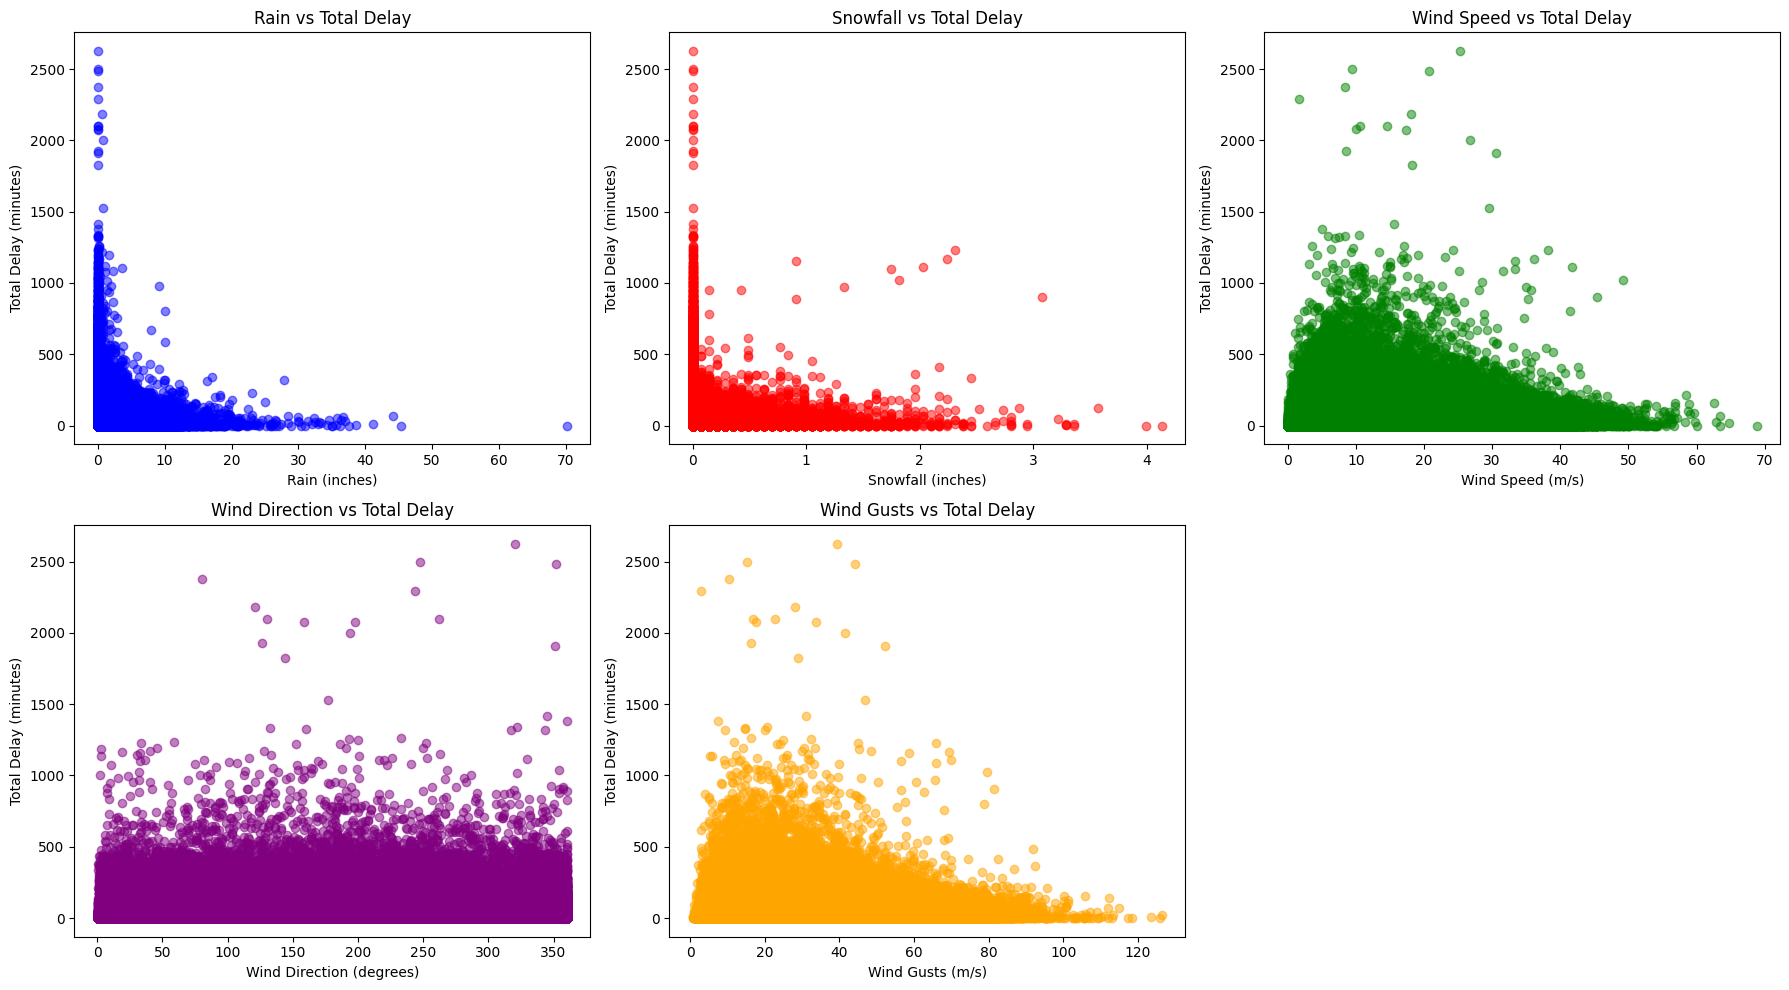

In [43]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes[0, 0].scatter(airport_hist_weather_delay['rain'], airport_hist_weather_delay['TOTAL_DELAY'], color='blue', alpha=0.5)
axes[0, 0].set_title('Rain vs Total Delay')
axes[0, 0].set_xlabel('Rain (inches)')
axes[0, 0].set_ylabel('Total Delay (minutes)')

axes[0, 1].scatter(airport_hist_weather_delay['snowfall'], airport_hist_weather_delay['TOTAL_DELAY'], color='red', alpha=0.5)
axes[0, 1].set_title('Snowfall vs Total Delay')
axes[0, 1].set_xlabel('Snowfall (inches)')
axes[0, 1].set_ylabel('Total Delay (minutes)')

axes[0, 2].scatter(airport_hist_weather_delay['wind_speed_10m'], airport_hist_weather_delay['TOTAL_DELAY'], color='green', alpha=0.5)
axes[0, 2].set_title('Wind Speed vs Total Delay')
axes[0, 2].set_xlabel('Wind Speed (m/s)')
axes[0, 2].set_ylabel('Total Delay (minutes)')

axes[1, 0].scatter(airport_hist_weather_delay['wind_direction_10m'], airport_hist_weather_delay['TOTAL_DELAY'], color='purple', alpha=0.5)
axes[1, 0].set_title('Wind Direction vs Total Delay')
axes[1, 0].set_xlabel('Wind Direction (degrees)')
axes[1, 0].set_ylabel('Total Delay (minutes)')

axes[1, 1].scatter(airport_hist_weather_delay['wind_gusts_10m'], airport_hist_weather_delay['TOTAL_DELAY'], color='orange', alpha=0.5)
axes[1, 1].set_title('Wind Gusts vs Total Delay')
axes[1, 1].set_xlabel('Wind Gusts (m/s)')
axes[1, 1].set_ylabel('Total Delay (minutes)')

fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()


In [44]:
airport_hist_weather_delay['Month'] = airport_hist_weather_delay['date'].dt.month
airport_hist_weather_delay['Year'] = airport_hist_weather_delay['date'].dt.year
year_month_delay = airport_hist_weather_delay.groupby(by =['Year', 'Month', 'airport_code'])['TOTAL_DELAY'].mean().reset_index()
year_month_delay['Rank'] = year_month_delay.groupby(['Year', 'Month'])['TOTAL_DELAY'].rank(ascending = False)
sorted_year_month_delay = year_month_delay.sort_values(by= ['Year', 'Month', 'Rank'])

In [47]:
sorted_year_month_delay

Year  Month airport_code  TOTAL_DELAY  Rank
7     2014      7          JFK    24.790398   1.0
9     2014      7          LAX    23.677229   2.0
18    2014      7          SFO    23.589655   3.0
5     2014      7          EWR    21.270707   4.0
2     2014      7          DAL    21.190458   5.0
...    ...    ...          ...          ...   ...
2877  2024      6          SMF    18.913503  20.0
2868  2024      6          MSY    18.170903  21.0
2862  2024      6          HOU    16.449754  22.0
2875  2024      6          SJC    15.906964  23.0
2878  2024      6          SNA    12.399713  24.0

[2880 rows x 5 columns]

In [48]:
import pandas as pd

weather_columns = ['rain', 'snowfall', 'wind_speed_10m', 'wind_direction_10m', 'wind_gusts_10m', 'TOTAL_DELAY']
airport_groups = airport_hist_weather_delay.groupby('airport_code')
airport_correlations = {}
for airport, group in airport_groups:
    airport_data = group[weather_columns]
    correlation_matrix = airport_data.corr()
    airport_correlations[airport] = correlation_matrix



In [49]:
for airport, corr_matrix in airport_correlations.items():
    print(f"Correlation matrix for {airport}:")
    print(corr_matrix)
    print("\n") 

Correlation matrix for ATL:
                        rain  snowfall  wind_speed_10m  wind_direction_10m  \
rain                1.000000  0.007457        0.091641           -0.068139   
snowfall            0.007457  1.000000        0.012209           -0.005094   
wind_speed_10m      0.091641  0.012209        1.000000            0.133248   
wind_direction_10m -0.068139 -0.005094        0.133248            1.000000   
wind_gusts_10m      0.172862  0.011177        0.885635            0.128857   
TOTAL_DELAY         0.036722  0.025304       -0.006007           -0.009628   

                    wind_gusts_10m  TOTAL_DELAY  
rain                      0.172862     0.036722  
snowfall                  0.011177     0.025304  
wind_speed_10m            0.885635    -0.006007  
wind_direction_10m        0.128857    -0.009628  
wind_gusts_10m            1.000000    -0.024701  
TOTAL_DELAY              -0.024701     1.000000  


Correlation matrix for CLT:
                        rain  snowfall  wind_

C:\Users\youss\AppData\Local\Temp\ipykernel_5508\2318748578.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  snowfall_delay = airport_hist_weather_delay.groupby(snowfall_bins)['TOTAL_DELAY'].mean()
C:\Users\youss\AppData\Local\Temp\ipykernel_5508\2318748578.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rainfall_delay = airport_hist_weather_delay.groupby(rainfall_bins)['TOTAL_DELAY'].mean()
C:\Users\youss\AppData\Local\Temp\ipykernel_5508\2318748578.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retai

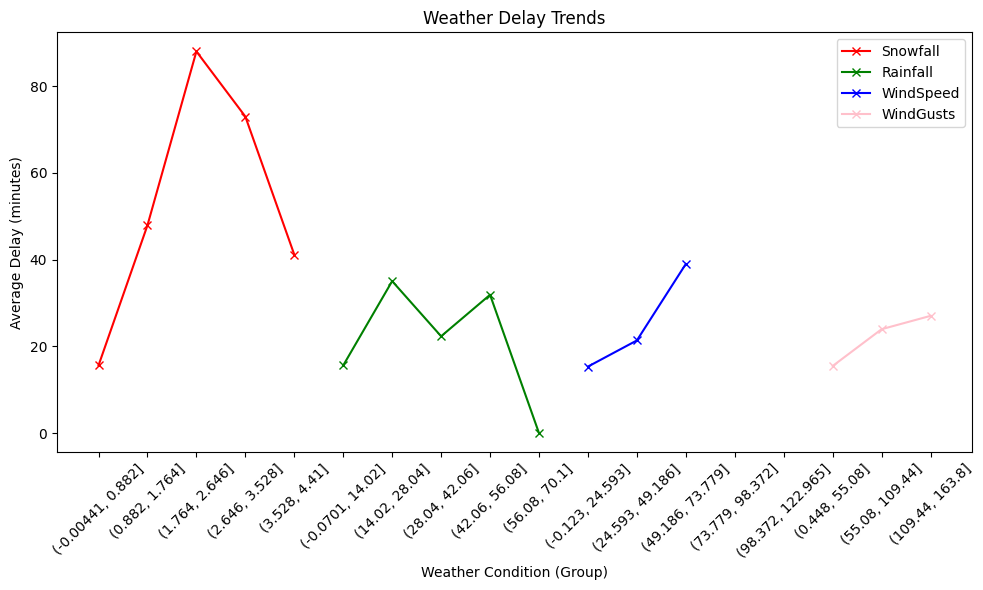

In [50]:
bins = 5  
snowfall_bins = pd.cut(airport_hist_weather_delay['snowfall'], bins=bins)
rainfall_bins = pd.cut(airport_hist_weather_delay['rain'], bins=bins)
windspeed_bins = pd.cut(airport_hist_weather_delay['wind_speed_10m'], bins=bins)
windgusts_bins = pd.cut(airport_hist_weather_delay['wind_gusts_10m'], bins=bins)


snowfall_delay = airport_hist_weather_delay.groupby(snowfall_bins)['TOTAL_DELAY'].mean()
rainfall_delay = airport_hist_weather_delay.groupby(rainfall_bins)['TOTAL_DELAY'].mean()
windspeed_delay = airport_hist_weather_delay.groupby(windspeed_bins)['TOTAL_DELAY'].mean()
windgust_delay = airport_hist_weather_delay.groupby(windgusts_bins)['TOTAL_DELAY'].mean()

plt.figure(figsize=(10, 6))

plt.plot(snowfall_delay.index.astype(str), snowfall_delay, color='red', label='Snowfall', marker='x')

plt.plot(rainfall_delay.index.astype(str), rainfall_delay, color='green', label='Rainfall', marker='x')

plt.plot(windspeed_delay.index.astype(str), windspeed_delay, color='blue', label='WindSpeed', marker='x')

plt.plot(windgust_delay.index.astype(str), windgust_delay, color='pink', label='WindGusts', marker='x')


plt.title('Weather Delay Trends')
plt.xlabel('Weather Condition (Group)')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\youss\AppData\Local\Temp\ipykernel_5508\3322890303.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = airport_hist_weather_delay.groupby(['airport_code', wind_bins])['TOTAL_DELAY'].mean().unstack()


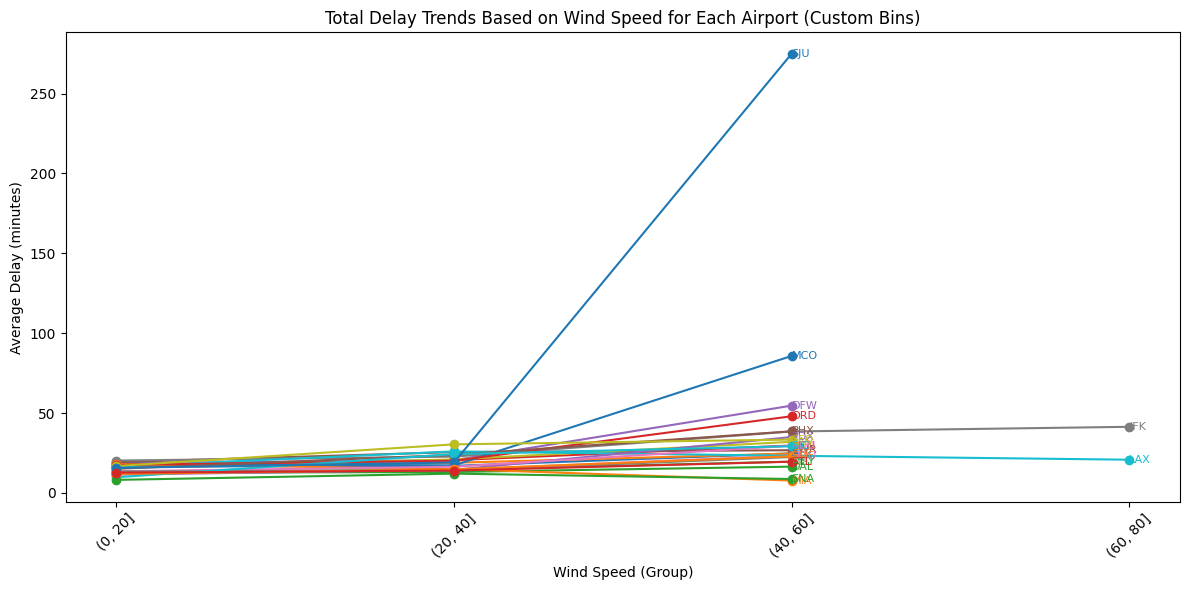

In [54]:
custom_bins_wind = [0, 20, 40, 60, 80, 100, 120, 140]  
wind_bins = pd.cut(airport_hist_weather_delay['wind_speed_10m'], bins=custom_bins_wind)

grouped_data = airport_hist_weather_delay.groupby(['airport_code', wind_bins])['TOTAL_DELAY'].mean().unstack()
grouped_data.columns = grouped_data.columns.astype(str)


plt.figure(figsize=(12, 6))

for airport in grouped_data.index:
    plt.plot(grouped_data.columns.astype(str), grouped_data.loc[airport], marker='o', label=airport)
    
    last_valid_index = grouped_data.loc[airport].last_valid_index()
    
    if last_valid_index is not None:
        plt.text(last_valid_index, grouped_data.loc[airport].loc[last_valid_index], airport,
                 fontsize=8, color=plt.gca().lines[-1].get_color(),
                 verticalalignment='center', horizontalalignment='left')

plt.title('Total Delay Trends Based on Wind Speed for Each Airport (Custom Bins)')
plt.xlabel('Wind Speed (Group)')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)


plt.subplots_adjust(right=0.85)

plt.tight_layout()
plt.show()

C:\Users\youss\AppData\Local\Temp\ipykernel_5508\317116366.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = airport_hist_weather_delay.groupby(['airport_code', snowfall_bins])['TOTAL_DELAY'].mean().unstack()


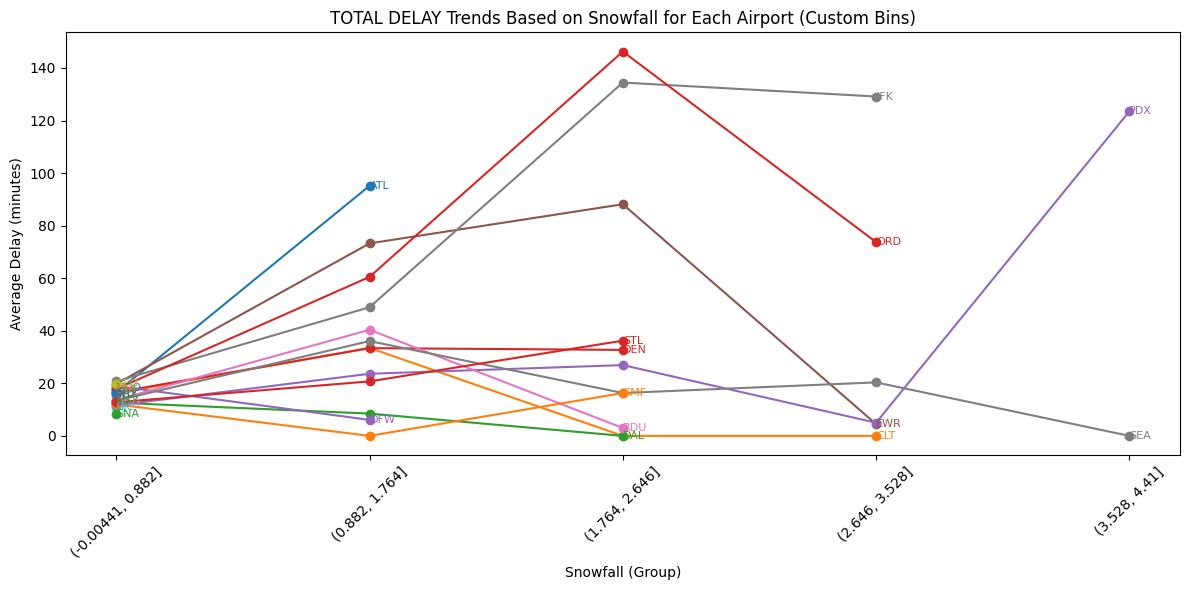

In [53]:
bins = 5  
snowfall_bins = pd.cut(airport_hist_weather_delay['snowfall'], bins=bins)

grouped_data = airport_hist_weather_delay.groupby(['airport_code', snowfall_bins])['TOTAL_DELAY'].mean().unstack()
grouped_data.columns = grouped_data.columns.astype(str)


plt.figure(figsize=(12, 6))

for airport in grouped_data.index:
    plt.plot(grouped_data.columns.astype(str), grouped_data.loc[airport], marker='o', label=airport)
    last_valid_index = grouped_data.loc[airport].last_valid_index()
    
    if last_valid_index is not None:
        plt.text(last_valid_index, grouped_data.loc[airport].loc[last_valid_index], airport,
                 fontsize=8, color=plt.gca().lines[-1].get_color(),
                 verticalalignment='center', horizontalalignment='left')

plt.title('TOTAL DELAY Trends Based on Snowfall for Each Airport (Custom Bins)')
plt.xlabel('Snowfall (Group)')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)

plt.subplots_adjust(right=0.85)

plt.tight_layout()
plt.show()

C:\Users\youss\AppData\Local\Temp\ipykernel_5508\169079294.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = airport_hist_weather_delay.groupby(['airport_code', wind_gust_bins])['TOTAL_DELAY'].mean().unstack()


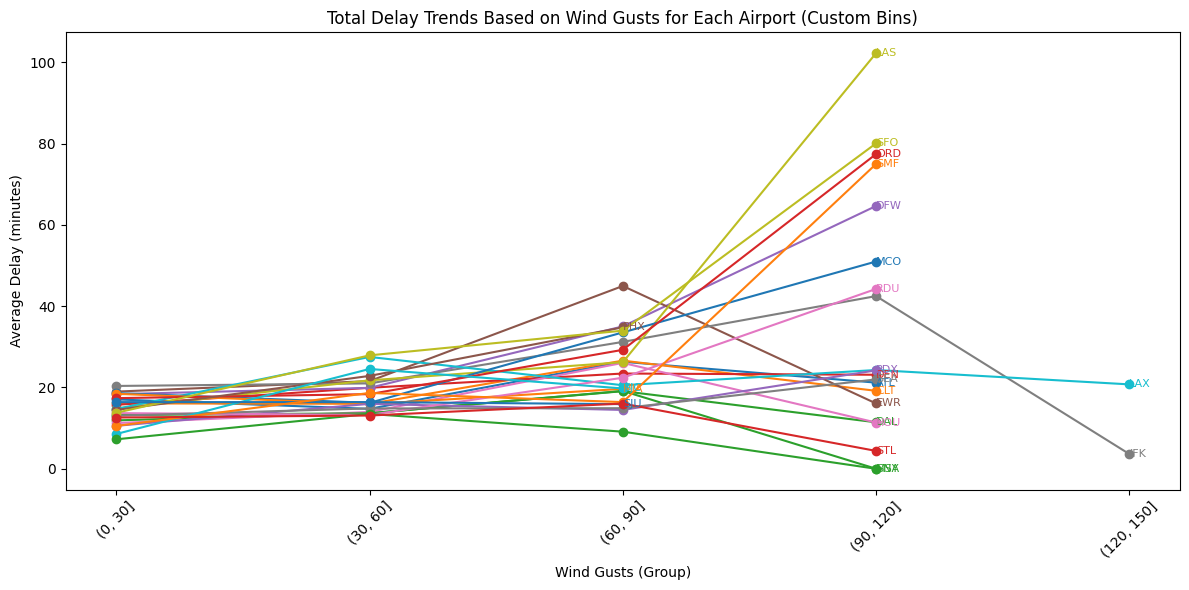

In [55]:
custom_bins_gust = [0, 30, 60, 90, 120, 150, 180, 210,240,270,300] 

wind_gust_bins = pd.cut(airport_hist_weather_delay['wind_gusts_10m'], bins=custom_bins_gust)

grouped_data = airport_hist_weather_delay.groupby(['airport_code', wind_gust_bins])['TOTAL_DELAY'].mean().unstack()
grouped_data.columns = grouped_data.columns.astype(str)


plt.figure(figsize=(12, 6))

for airport in grouped_data.index:
    plt.plot(grouped_data.columns.astype(str), grouped_data.loc[airport], marker='o', label=airport)
    
    last_valid_index = grouped_data.loc[airport].last_valid_index()
    
    if last_valid_index is not None:
        plt.text(last_valid_index, grouped_data.loc[airport].loc[last_valid_index], airport,
                 fontsize=8, color=plt.gca().lines[-1].get_color(),
                 verticalalignment='center', horizontalalignment='left')

plt.title('Total Delay Trends Based on Wind Gusts for Each Airport (Custom Bins)')
plt.xlabel('Wind Gusts (Group)')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)

plt.subplots_adjust(right=0.85)

plt.tight_layout()
plt.show()

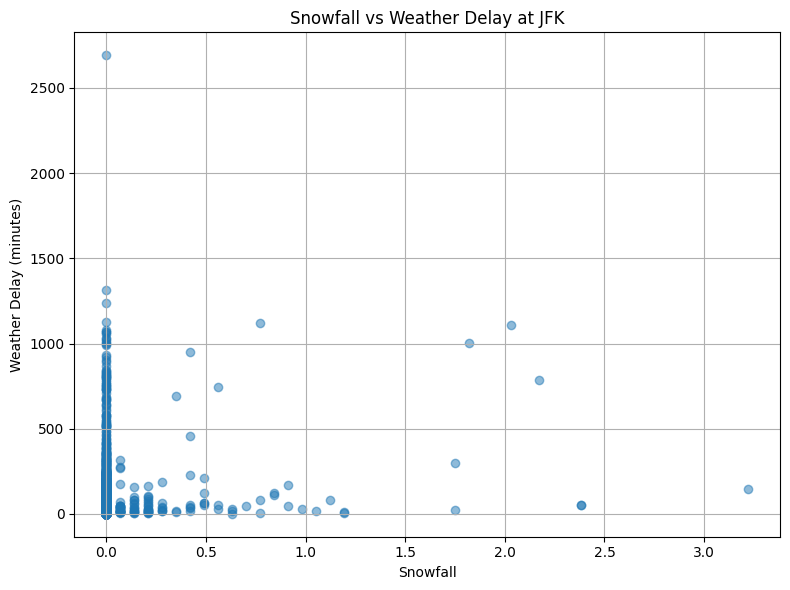

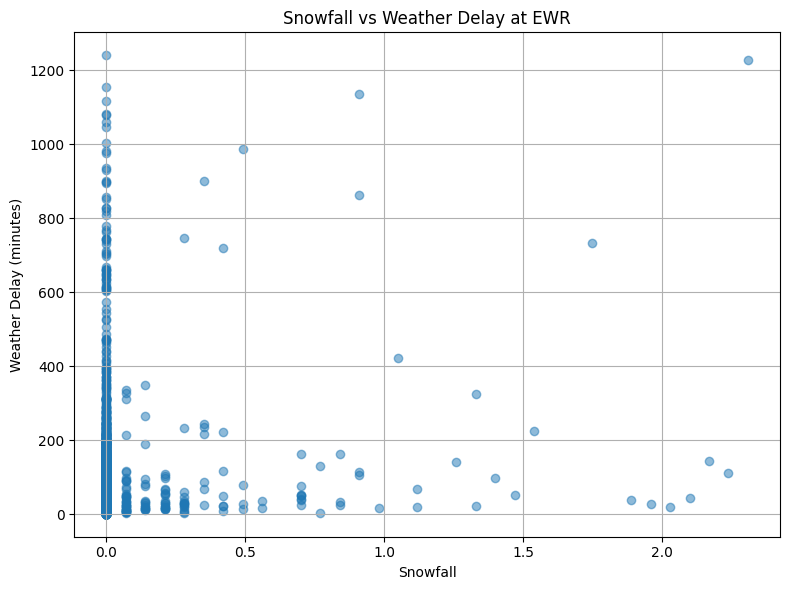

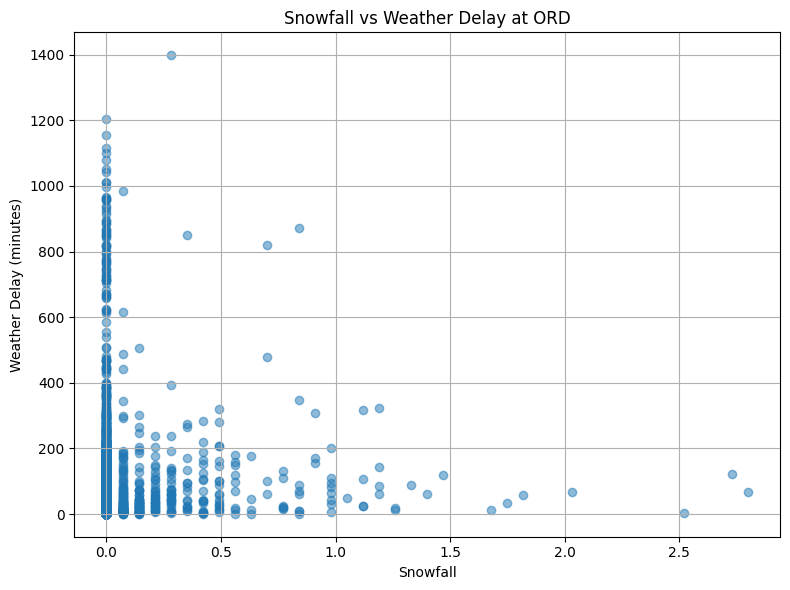

In [344]:
airports = ['JFK', 'EWR', 'ORD']
filtered_data = airport_hist_weather_delay[airport_hist_weather_delay['airport_code'].isin(airports)]

weather_factors = ['snowfall']

for airport in airports:
    airport_data = filtered_data[filtered_data['airport_code'] == airport]
    
    for factor in weather_factors:
        plt.figure(figsize=(8, 6))
        plt.scatter(airport_data[factor], airport_data['WEATHER_DELAY'], alpha=0.5)
        plt.title(f'{factor.capitalize()} vs Weather Delay at {airport}')
        plt.xlabel(f'{factor.capitalize()}')
        plt.ylabel('Weather Delay (minutes)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

C:\Users\youss\AppData\Local\Temp\ipykernel_25428\525770918.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['WEATHER_DELAY'].mean()


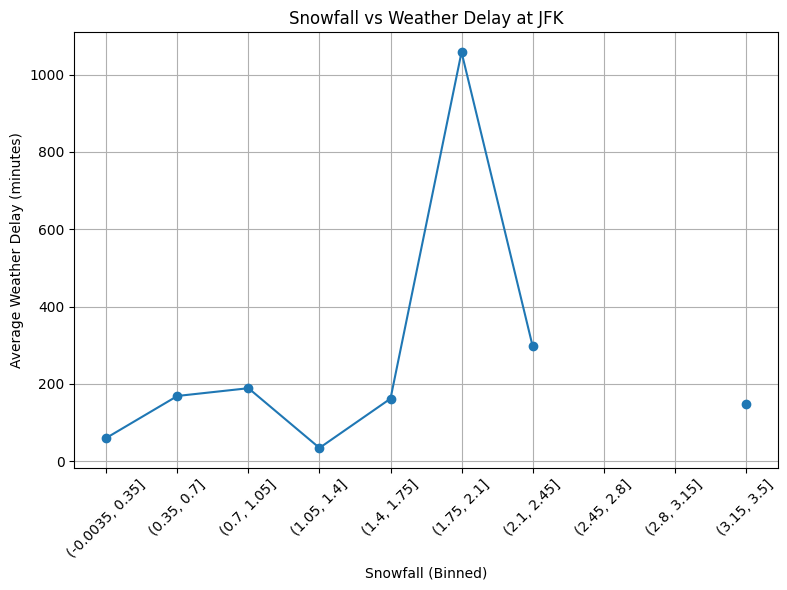

C:\Users\youss\AppData\Local\Temp\ipykernel_25428\525770918.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['WEATHER_DELAY'].mean()


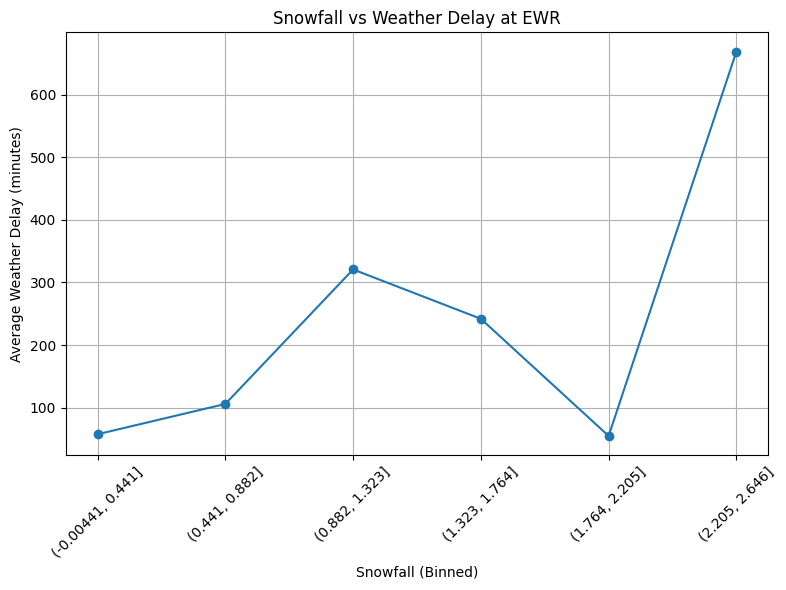

C:\Users\youss\AppData\Local\Temp\ipykernel_25428\525770918.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['WEATHER_DELAY'].mean()


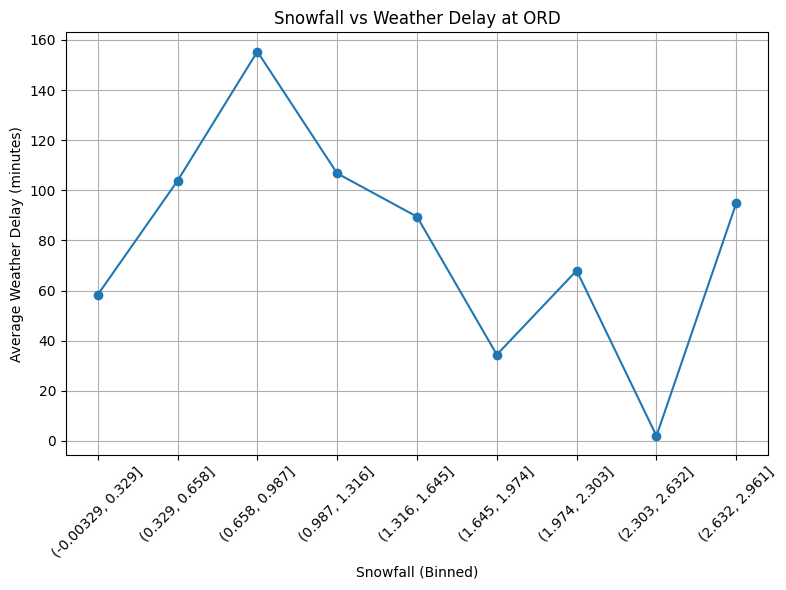

In [345]:
airports = ['JFK', 'EWR', 'ORD']
filtered_data = airport_hist_weather_delay[airport_hist_weather_delay['airport_code'].isin(airports)]

weather_factors = ['snowfall']

bins = 10

for airport in airports:
    airport_data = filtered_data[filtered_data['airport_code'] == airport]
    
    for factor in weather_factors:
        binned_data = pd.cut(airport_data[factor], bins=bins)
        avg_delay = airport_data.groupby(binned_data)['WEATHER_DELAY'].mean()
        
        plt.figure(figsize=(8, 6))
        plt.plot(avg_delay.index.astype(str), avg_delay, marker='o')
        plt.title(f'{factor.capitalize()} vs Weather Delay at {airport}')
        plt.xlabel(f'{factor.capitalize()} (Binned)')
        plt.ylabel('Average Weather Delay (minutes)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

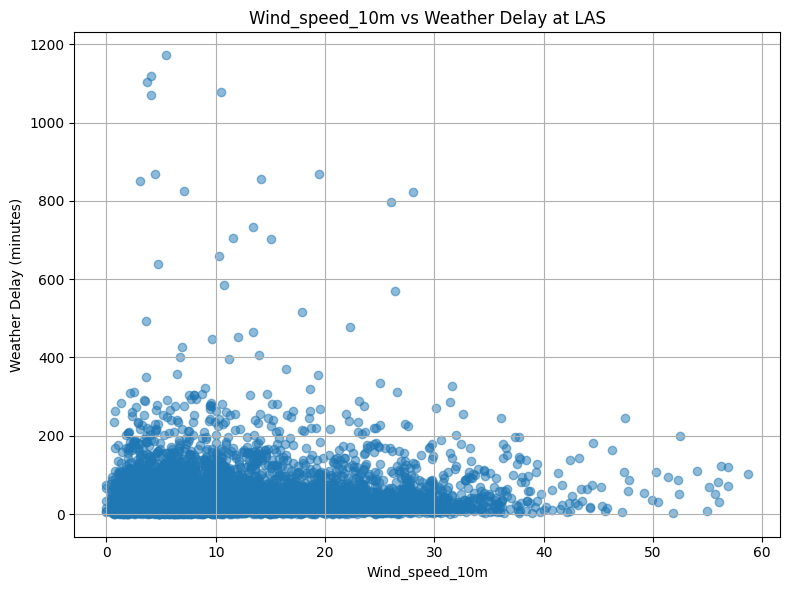

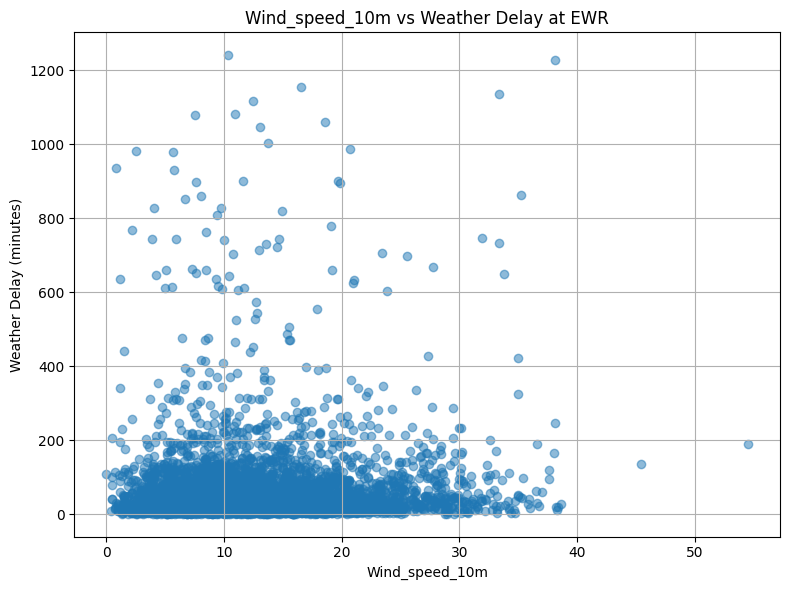

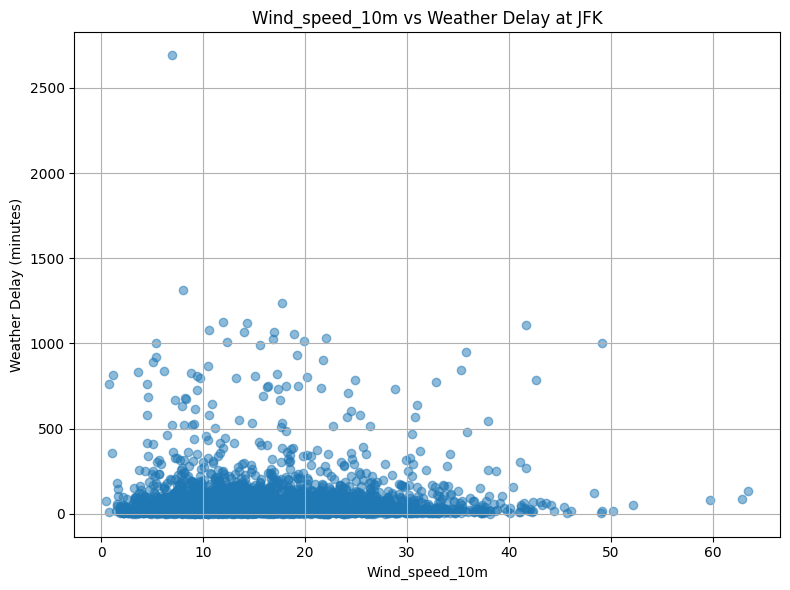

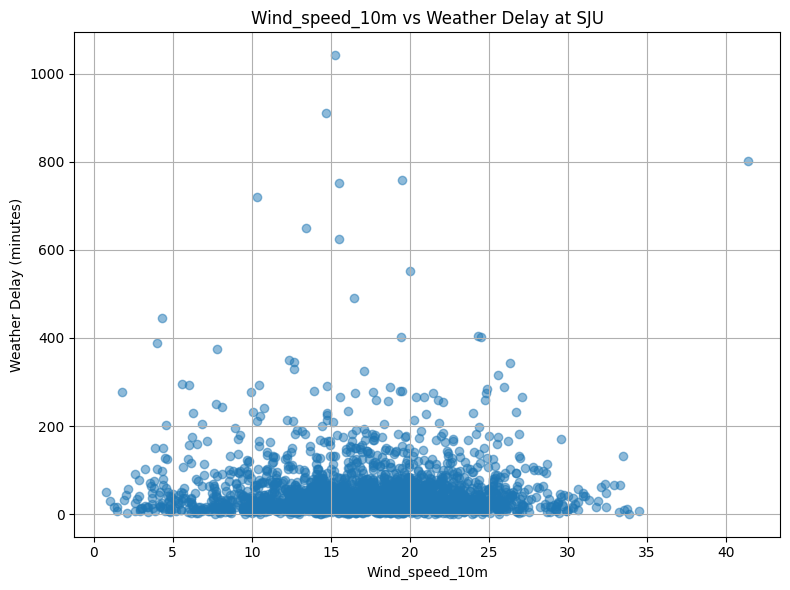

In [346]:
airports = ['LAS', 'EWR', 'JFK', 'SJU']
filtered_data = airport_hist_weather_delay[airport_hist_weather_delay['airport_code'].isin(airports)]

weather_factors = ['wind_speed_10m']

for airport in airports:
    airport_data = filtered_data[filtered_data['airport_code'] == airport]
    
    for factor in weather_factors:
        plt.figure(figsize=(8, 6))
        plt.scatter(airport_data[factor], airport_data['WEATHER_DELAY'], alpha=0.5)
        plt.title(f'{factor.capitalize()} vs Weather Delay at {airport}')
        plt.xlabel(f'{factor.capitalize()}')
        plt.ylabel('Weather Delay (minutes)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

C:\Users\youss\AppData\Local\Temp\ipykernel_25428\3403817575.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['WEATHER_DELAY'].mean()


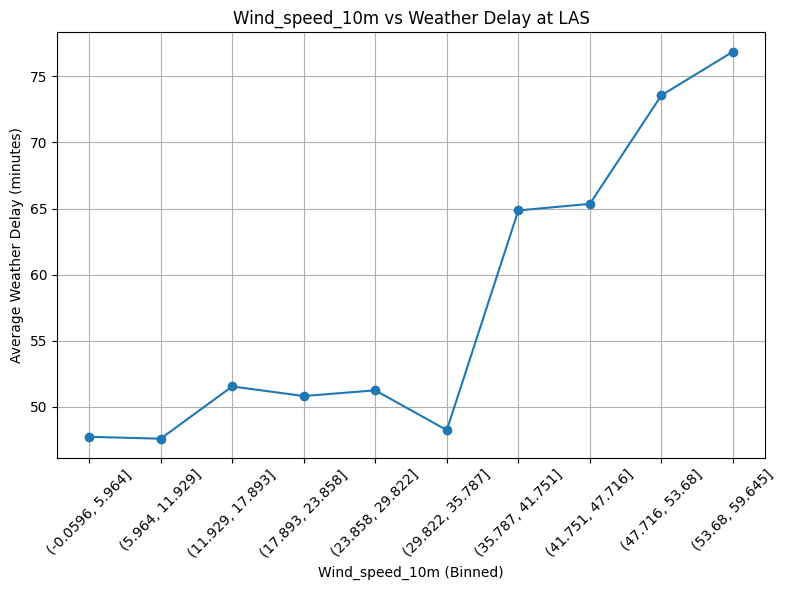

C:\Users\youss\AppData\Local\Temp\ipykernel_25428\3403817575.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['WEATHER_DELAY'].mean()


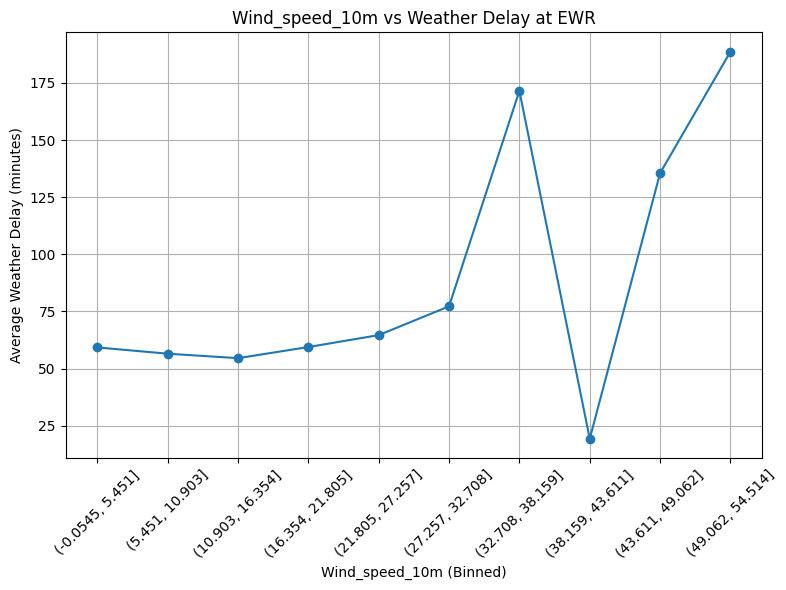

C:\Users\youss\AppData\Local\Temp\ipykernel_25428\3403817575.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['WEATHER_DELAY'].mean()


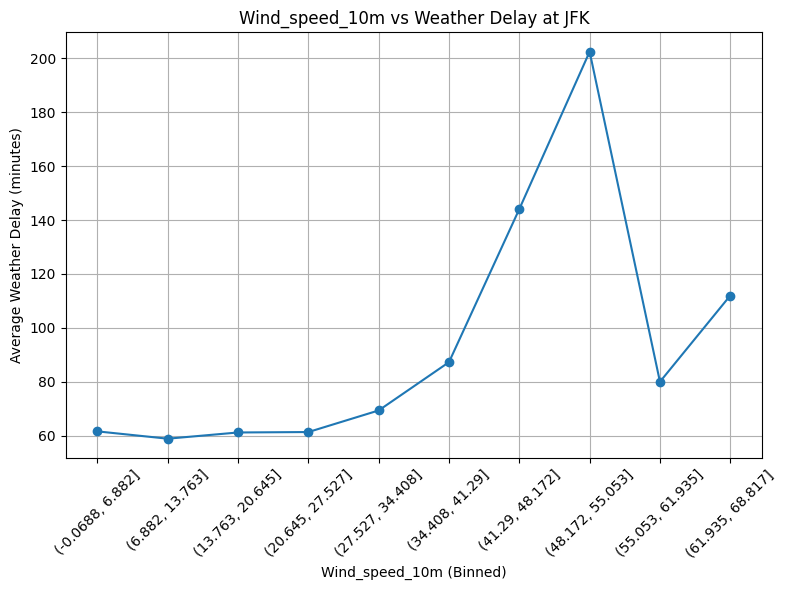

C:\Users\youss\AppData\Local\Temp\ipykernel_25428\3403817575.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['WEATHER_DELAY'].mean()


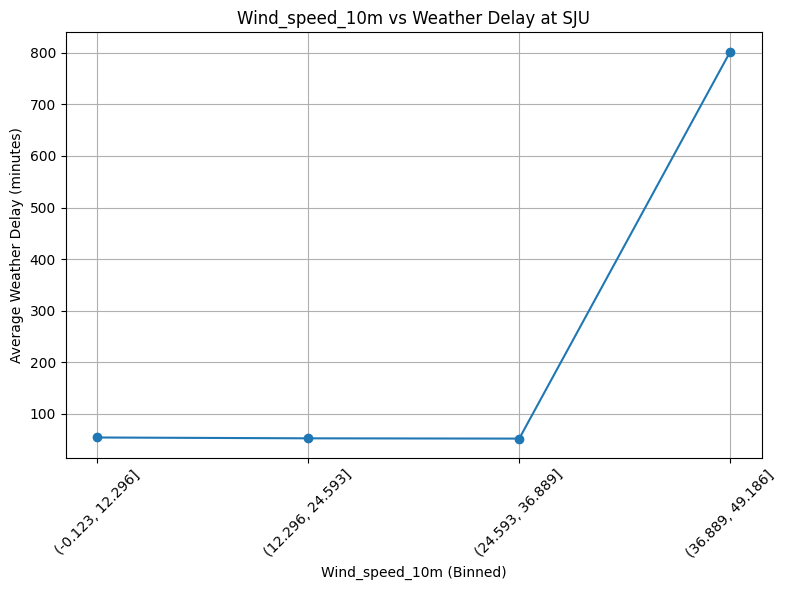

In [347]:
airports = ['LAS', 'EWR', 'JFK', 'SJU']
filtered_data = airport_hist_weather_delay[airport_hist_weather_delay['airport_code'].isin(airports)]

weather_factors = ['wind_speed_10m']

bins = 10

for airport in airports:
    airport_data = filtered_data[filtered_data['airport_code'] == airport]
    
    for factor in weather_factors:
        binned_data = pd.cut(airport_data[factor], bins=bins)
        avg_delay = airport_data.groupby(binned_data)['WEATHER_DELAY'].mean()
        
        # Plot the line plot
        plt.figure(figsize=(8, 6))
        plt.plot(avg_delay.index.astype(str), avg_delay, marker='o')
        plt.title(f'{factor.capitalize()} vs Weather Delay at {airport}')
        plt.xlabel(f'{factor.capitalize()} (Binned)')
        plt.ylabel('Average Weather Delay (minutes)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

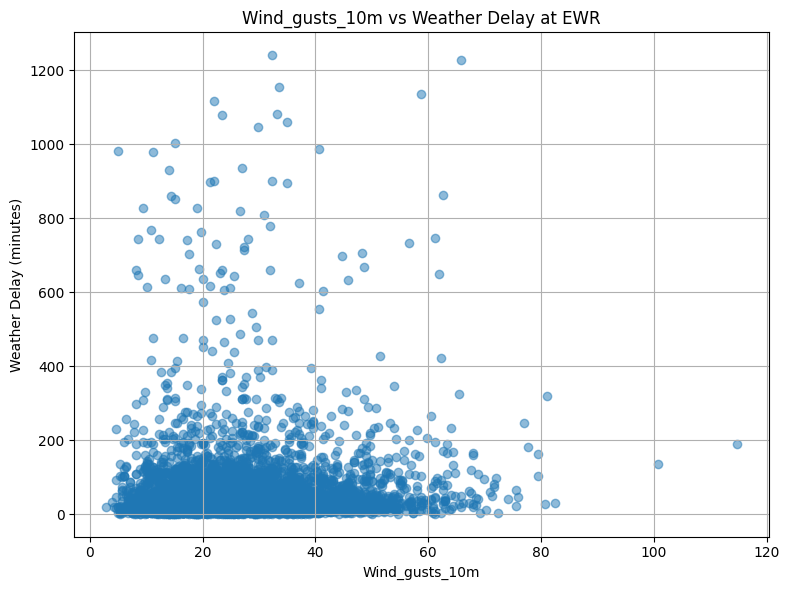

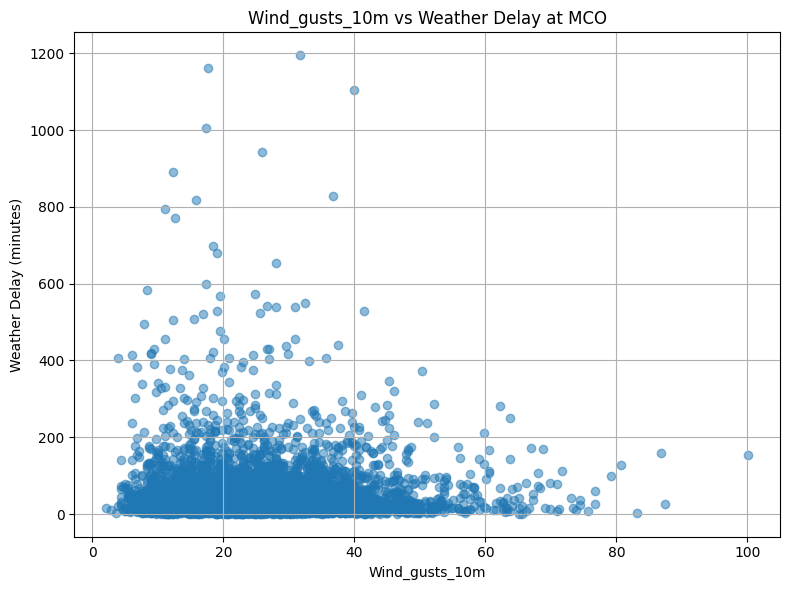

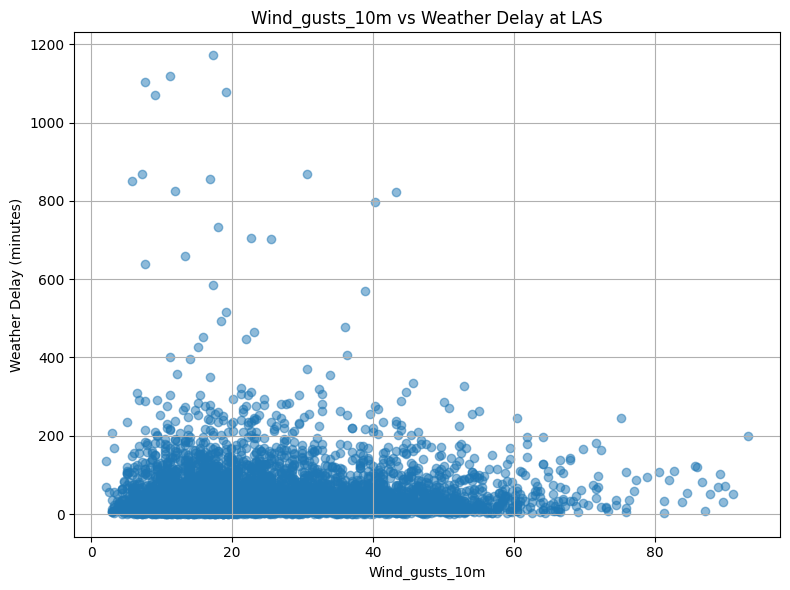

In [348]:
airports = ['EWR', 'MCO', 'LAS']
filtered_data = airport_hist_weather_delay[airport_hist_weather_delay['airport_code'].isin(airports)]

weather_factors = ['wind_gusts_10m']

for airport in airports:
    airport_data = filtered_data[filtered_data['airport_code'] == airport]
    
    for factor in weather_factors:
        plt.figure(figsize=(8, 6))
        plt.scatter(airport_data[factor], airport_data['WEATHER_DELAY'], alpha=0.5)
        plt.title(f'{factor.capitalize()} vs Weather Delay at {airport}')
        plt.xlabel(f'{factor.capitalize()}')
        plt.ylabel('Weather Delay (minutes)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

C:\Users\youss\AppData\Local\Temp\ipykernel_25428\3117916938.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['WEATHER_DELAY'].mean()


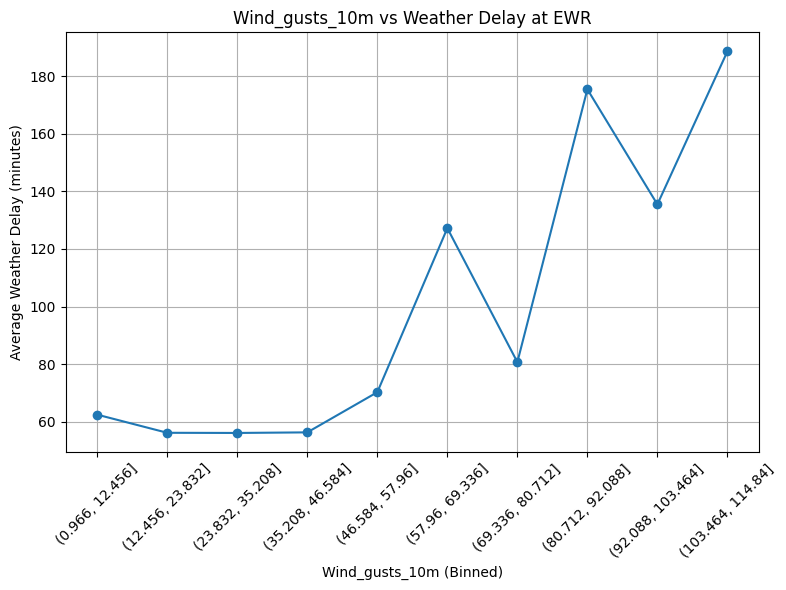

C:\Users\youss\AppData\Local\Temp\ipykernel_25428\3117916938.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['WEATHER_DELAY'].mean()


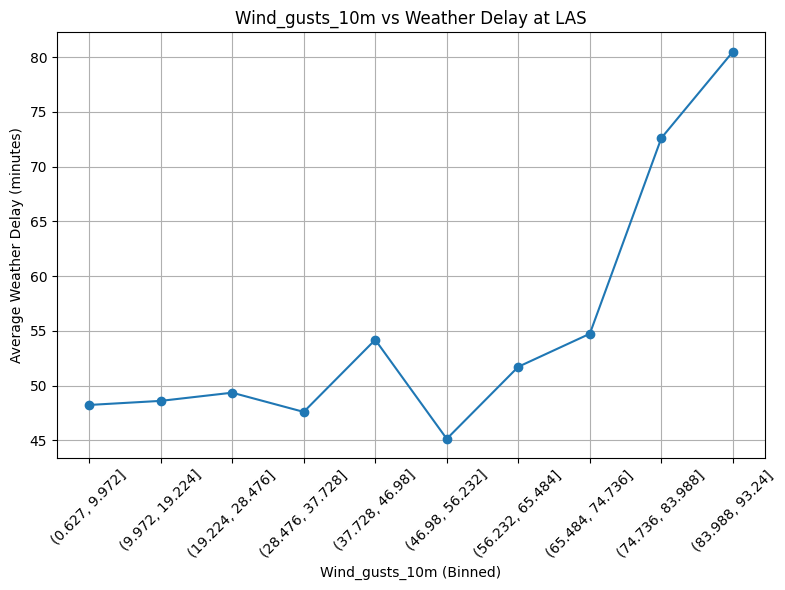

C:\Users\youss\AppData\Local\Temp\ipykernel_25428\3117916938.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['WEATHER_DELAY'].mean()


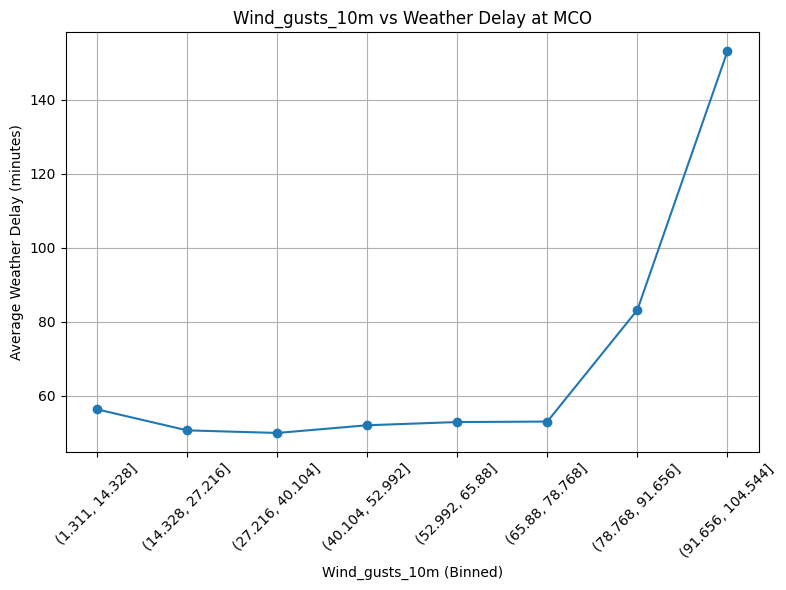

In [349]:
airports = ['EWR', 'LAS', 'MCO']
filtered_data = airport_hist_weather_delay[airport_hist_weather_delay['airport_code'].isin(airports)]

weather_factors = ['wind_gusts_10m']

bins = 10

for airport in airports:
    airport_data = filtered_data[filtered_data['airport_code'] == airport]
    
    for factor in weather_factors:
        binned_data = pd.cut(airport_data[factor], bins=bins)
        avg_delay = airport_data.groupby(binned_data)['WEATHER_DELAY'].mean()
        
        plt.figure(figsize=(8, 6))
        plt.plot(avg_delay.index.astype(str), avg_delay, marker='o')
        plt.title(f'{factor.capitalize()} vs Weather Delay at {airport}')
        plt.xlabel(f'{factor.capitalize()} (Binned)')
        plt.ylabel('Average Weather Delay (minutes)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [350]:
airports = ['JFK', 'EWR', 'ORD']

results = {}

for airport in airports:
    airport_data = airport_hist_weather_delay[airport_hist_weather_delay['airport_code'] == airport]
    
    monthly_averages = airport_data.groupby('Month').agg({  
        'snowfall': 'mean'  
    }).reset_index()
    

    monthly_averages['Snowfall_Rank'] = monthly_averages['snowfall'].rank(ascending=False)
    
    results[airport] = monthly_averages

for airport, ranking in results.items():
    print(f"Ranking for {airport}:")
    print(ranking)
    print("\n")

Ranking for JFK:
    Month  snowfall  Snowfall_Rank
0       1  0.020022            3.0
1       2  0.026497            1.0
2       3  0.023315            2.0
3       4  0.001429            6.0
4       5  0.000019            7.0
5       6  0.000000           10.5
6       7  0.000000           10.5
7       8  0.000000           10.5
8       9  0.000000           10.5
9      10  0.000009            8.0
10     11  0.002751            5.0
11     12  0.008505            4.0


Ranking for EWR:
    Month  snowfall  Snowfall_Rank
0       1  0.019504            3.0
1       2  0.027961            1.0
2       3  0.024387            2.0
3       4  0.001769            6.0
4       5  0.000047            7.0
5       6  0.000000           10.0
6       7  0.000000           10.0
7       8  0.000000           10.0
8       9  0.000000           10.0
9      10  0.000000           10.0
10     11  0.004074            5.0
11     12  0.009239            4.0


Ranking for ORD:
    Month  snowfall  Snowfall_Rank


In [351]:
airports = ['JFK', 'EWR', 'ORD']

results = {}

for airport in airports:
    airport_data = airport_hist_weather_delay[airport_hist_weather_delay['airport_code'] == airport]
    
    monthly_averages = airport_data.groupby('Month').agg({ 
        'snowfall': 'max'  
    }).reset_index()
    
   
    
    monthly_averages['Snowfall_Rank'] = monthly_averages['snowfall'].rank(ascending=False)
    
    results[airport] = monthly_averages

for airport, ranking in results.items():
    print(f"Ranking for {airport}:")
    print(ranking)
    print("\n")

Ranking for JFK:
    Month  snowfall  Snowfall_Rank
0       1      3.08            3.0
1       2      3.22            2.0
2       3      3.50            1.0
3       4      1.96            6.0
4       5      0.07            7.5
5       6      0.00           10.5
6       7      0.00           10.5
7       8      0.00           10.5
8       9      0.00           10.5
9      10      0.07            7.5
10     11      2.24            5.0
11     12      2.73            4.0


Ranking for EWR:
    Month  snowfall  Snowfall_Rank
0       1      2.45            3.5
1       2      3.36            2.0
2       3      4.41            1.0
3       4      2.17            5.0
4       5      0.14            7.0
5       6      0.00           10.0
6       7      0.00           10.0
7       8      0.00           10.0
8       9      0.00           10.0
9      10      0.00           10.0
10     11      2.45            3.5
11     12      1.96            6.0


Ranking for ORD:
    Month  snowfall  Snowfall_Rank


# CANCELLATIONS

In [71]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": [33.64, 35.21, 32.85, 39.86, 32.9, 40.69, 29.64, 40.64, 36.08, 33.94, 28.43, 25.79, 29.99, 41.97, 45.59, 33.43, 35.88, 47.45, 37.62, 37.36, 18.44, 38.7, 33.68, 38.75],
    "longitude": [-84.43, -80.95, -96.85, -104.67, -97.04, -74.17, -95.28, -73.78, -115.15, -118.41, -81.31, -80.29, -90.25, -87.91, -122.6, -112.01, -78.78, -122.31, -122.38, -121.94, -66, -121.59, -117.87, -90.37],
    "daily": ["weather_code","rain_sum", "snowfall_sum", "wind_speed_10m_max", "wind_gusts_10m_max"],
    "start_date": "2014-07-01",
    "end_date": "2024-06-30",
}
responses = openmeteo.weather_api(url, params=params)
dataset_airport_codes = [ x for x in dataset_airport_geo_codes['AIRPORT']]
airport_weather_dataframe_list = []
for row , airport_code in zip(range(len(responses)), dataset_airport_codes): 
# Process first location. Add a for-loop for multiple locations or weather models
    response = responses[row]
    print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
    print(f"Elevation {response.Elevation()} m asl")
    print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
    print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

	# Process daily data. The order of variables needs to be the same as requested.
    daily = response.Daily()
    daily_weather_code = daily.Variables(0).ValuesAsNumpy()
    daily_rain_sum = daily.Variables(1).ValuesAsNumpy()
    daily_snowfall_sum = daily.Variables(2).ValuesAsNumpy()
    daily_wind_speed_10m_max = daily.Variables(3).ValuesAsNumpy()
    daily_wind_gusts_10m_max = daily.Variables(4).ValuesAsNumpy()

    daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
    daily_data['airport_code'] = airport_code
    daily_data["weather_code"] = daily_weather_code
    daily_data["rain_sum"] = daily_rain_sum
    daily_data["snowfall_sum"] = daily_snowfall_sum
    daily_data["wind_speed_10m_max"] = daily_wind_speed_10m_max
    daily_data["wind_gusts_10m_max"] = daily_wind_gusts_10m_max

    daily_dataframe = pd.DataFrame(data = daily_data)
    airport_weather_dataframe_list.append(daily_dataframe)

Coordinates 33.63795852661133°N -84.4168701171875°E
Elevation 305.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 35.184532165527344°N -80.93112182617188°E
Elevation 213.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 32.86467361450195°N -96.82986450195312°E
Elevation 146.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 39.89455032348633°N -104.68618774414062°E
Elevation 1633.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 32.93497085571289°N -97.05880737304688°E
Elevation 178.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 40.6678352355957°N -74.19265747070312°E
Elevation 2.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 29.630929946899414°N -95.31866455078125°E
Elevation 12.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
Coordinates 40.6678352355957°N -73.81021118164062°E
Elevation 3.0 m asl
Timezone None None
Timezone difference t

In [72]:
airport_hist_weather_data_daily = pd.concat(airport_weather_dataframe_list, axis=0)
airport_hist_weather_data_daily = pd.merge(airport_hist_weather_data_daily, weather_codes, how="left", on='weather_code')
airport_hist_weather_data_daily['date'] = airport_hist_weather_data_daily['date'].dt.tz_localize(None)

In [74]:
airport_hist_weather_data_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87672 entries, 0 to 87671
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      87672 non-null  datetime64[ns]
 1   airport_code              87672 non-null  object        
 2   weather_code              87672 non-null  float32       
 3   rain_sum                  87672 non-null  float32       
 4   snowfall_sum              87672 non-null  float32       
 5   wind_speed_10m_max        87672 non-null  float32       
 6   wind_gusts_10m_max        87672 non-null  float32       
 7   Weather Code Description  87672 non-null  object        
dtypes: datetime64[ns](1), float32(5), object(2)
memory usage: 3.7+ MB


In [75]:
airport_hist_weather_data_daily

date airport_code  weather_code   rain_sum  snowfall_sum  \
0     2014-07-01          ATL           3.0   0.000000           0.0   
1     2014-07-02          ATL          53.0   0.500000           0.0   
2     2014-07-03          ATL          53.0   0.500000           0.0   
3     2014-07-04          ATL           3.0   0.000000           0.0   
4     2014-07-05          ATL           2.0   0.000000           0.0   
...          ...          ...           ...        ...           ...   
87667 2024-06-26          STL          63.0  28.400000           0.0   
87668 2024-06-27          STL           0.0   0.000000           0.0   
87669 2024-06-28          STL           3.0   0.000000           0.0   
87670 2024-06-29          STL          63.0  24.300001           0.0   
87671 2024-06-30          STL          53.0   2.600000           0.0   

       wind_speed_10m_max  wind_gusts_10m_max  \
0                8.217153           24.480000   
1                9.107359           25.199999   
2               20.421871           44.279999   
3               16.179987           40.680000   
4               18.003599           38.880001   
...                   ...                 ...   
87667           18.003599           39.239998   
87668            9.693295           31.319998   
87669           20.721119           39.599998   
87670           25.364037           53.279999   
87671           15.745627           33.839996   

                   Weather Code Description  
0                      Sky becoming clearer  
1                   Slight freezing drizzle  
2                   Slight freezing drizzle  
3                      Sky becoming clearer  
4      State of the sky generally unchanged  
...                                     ...  
87667                   Light freezing rain  
87668       No significant weather observed  
87669                  Sky becoming clearer  
87670                   Light freezing rain  
87671               Slight freezing drizzle  

[87672 rows x 8 columns]

In [57]:
weather_cancelled

FL_DATE OP_UNIQUE_CARRIER TAIL_NUM  ORIGIN_AIRPORT_SEQ_ID  \
0        2014-07-01                AA   N002AA                1105703   
1        2014-07-01                AA   N002AA                1129803   
2        2014-07-01                AA   N004AA                1039705   
3        2014-07-01                AA   N004AA                1129803   
4        2014-07-01                AA   N004AA                1129803   
...             ...               ...      ...                    ...   
12926551 2018-12-31                YX   N864RW                1105703   
12926552 2018-12-31                YX   N864RW                1161802   
12926553 2018-12-31                YX   N868RW                1247805   
12926554 2018-12-31                YX   N870RW                1247805   
12926555 2018-12-31                YX   N870RW                1393007   

          ORIGIN_CITY_MARKET_ID ORIGIN       ORIGIN_CITY_NAME  \
0                         31057    CLT          Charlotte, NC   
1                         30194    DFW  Dallas/Fort Worth, TX   
2                         30397    ATL            Atlanta, GA   
3                         30194    DFW  Dallas/Fort Worth, TX   
4                         30194    DFW  Dallas/Fort Worth, TX   
...                         ...    ...                    ...   
12926551                  31057    CLT          Charlotte, NC   
12926552                  31703    EWR             Newark, NJ   
12926553                  31703    JFK           New York, NY   
12926554                  31703    JFK           New York, NY   
12926555                  30977    ORD            Chicago, IL   

          DEST_AIRPORT_SEQ_ID  DEST_CITY_MARKET_ID DEST  ... ARR_TIME  \
0                     1129803                30194  DFW  ...   1214.0   
1                     1105703                31057  CLT  ...    945.0   
2                     1129803                30194  DFW  ...   1341.0   
3                     1039705                30397  ATL  ...   1159.0   
4                     1039705                30397  ATL  ...   2317.0   
...                       ...                  ...  ...  ...      ...   
12926551              1161802                31703  EWR  ...   1149.0   
12926552              1105703                31057  CLT  ...   1659.0   
12926553              1129806                30194  DFW  ...   2155.0   
12926554              1393007                30977  ORD  ...   1001.0   
12926555              1247805                31703  JFK  ...   1352.0   

          ARR_DELAY  CANCELLED  CANCELLATION_CODE  CARRIER_DELAY  \
0               9.0        0.0                NaN            NaN   
1               0.0        0.0                NaN            NaN   
2              -9.0        0.0                NaN            NaN   
3               4.0        0.0                NaN            NaN   
4               2.0        0.0                NaN            NaN   
...             ...        ...                ...            ...   
12926551      -29.0        0.0                NaN            NaN   
12926552       -3.0        0.0                NaN            NaN   
12926553        7.0        0.0                NaN            NaN   
12926554        4.0        0.0                NaN            NaN   
12926555       -5.0        0.0                NaN            NaN   

          WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY LATE_AIRCRAFT_DELAY  \
0                   NaN        NaN             NaN                 NaN   
1                   NaN        NaN             NaN                 NaN   
2                   NaN        NaN             NaN                 NaN   
3                   NaN        NaN             NaN                 NaN   
4                   NaN        NaN             NaN                 NaN   
...                 ...        ...             ...                 ...   
12926551            NaN        NaN             NaN                 NaN   
12926552            NaN        NaN             NaN                 N

In [76]:
weather_cancelled = us_avaiation_data
weather_cancelled = weather_cancelled.rename(columns={'FL_DATE':'date', 'ORIGIN': 'airport_code'})
weather_cancelled_counts = weather_cancelled.groupby(['date', 'airport_code']).agg(
    canceled_flights=('CANCELLED', lambda x: (x == 1.0).sum()),       
    non_canceled_flights=('CANCELLED', lambda x: (x == 0.0).sum())   
).reset_index()
weather_cancelled_counts['total_flights'] = weather_cancelled_counts['non_canceled_flights'] + weather_cancelled_counts['canceled_flights']
weather_cancelled_counts['cancellation_ratio'] = weather_cancelled_counts['canceled_flights'] / weather_cancelled_counts['total_flights']


weather_cancelled_counts = pd.DataFrame(weather_cancelled_counts)

In [77]:
weather_cancelled_counts

date airport_code  canceled_flights  non_canceled_flights  \
0     2014-07-01          ATL                 0                   257   
1     2014-07-01          CLT                 0                   141   
2     2014-07-01          DAL                 3                    43   
3     2014-07-01          DEN                 1                   213   
4     2014-07-01          DFW                 0                   234   
...          ...          ...               ...                   ...   
87667 2024-06-30          SJC                 0                    87   
87668 2024-06-30          SJU                 1                    68   
87669 2024-06-30          SMF                 1                    93   
87670 2024-06-30          SNA                 2                    93   
87671 2024-06-30          STL                 1                    92   

       total_flights  cancellation_ratio  
0                257            0.000000  
1                141            0.000000  
2                 46            0.065217  
3                214            0.004673  
4                234            0.000000  
...              ...                 ...  
87667             87            0.000000  
87668             69            0.014493  
87669             94            0.010638  
87670             95            0.021053  
87671             93            0.010753  

[87672 rows x 6 columns]

In [78]:
airport_hist_weather_daily_data_cancelled = pd.merge(left=airport_hist_weather_data_daily, right=weather_cancelled_counts, how='inner', on = ['date', 'airport_code'])

In [79]:
airport_hist_weather_daily_data_cancelled

date airport_code  weather_code   rain_sum  snowfall_sum  \
0     2014-07-01          ATL           3.0   0.000000           0.0   
1     2014-07-02          ATL          53.0   0.500000           0.0   
2     2014-07-03          ATL          53.0   0.500000           0.0   
3     2014-07-04          ATL           3.0   0.000000           0.0   
4     2014-07-05          ATL           2.0   0.000000           0.0   
...          ...          ...           ...        ...           ...   
87667 2024-06-26          STL          63.0  28.400000           0.0   
87668 2024-06-27          STL           0.0   0.000000           0.0   
87669 2024-06-28          STL           3.0   0.000000           0.0   
87670 2024-06-29          STL          63.0  24.300001           0.0   
87671 2024-06-30          STL          53.0   2.600000           0.0   

       wind_speed_10m_max  wind_gusts_10m_max  \
0                8.217153           24.480000   
1                9.107359           25.199999   
2               20.421871           44.279999   
3               16.179987           40.680000   
4               18.003599           38.880001   
...                   ...                 ...   
87667           18.003599           39.239998   
87668            9.693295           31.319998   
87669           20.721119           39.599998   
87670           25.364037           53.279999   
87671           15.745627           33.839996   

                   Weather Code Description  canceled_flights  \
0                      Sky becoming clearer                 0   
1                   Slight freezing drizzle                 3   
2                   Slight freezing drizzle                10   
3                      Sky becoming clearer                 1   
4      State of the sky generally unchanged                 0   
...                                     ...               ...   
87667                   Light freezing rain                 0   
87668       No significant weather observed                 0   
87669                  Sky becoming clearer                 0   
87670                   Light freezing rain                 0   
87671               Slight freezing drizzle                 1   

       non_canceled_flights  total_flights  cancellation_ratio  
0                       257            257            0.000000  
1                       265            268            0.011194  
2                       261            271            0.036900  
3                       198            199            0.005025  
4                       217            217            0.000000  
...                     ...            ...                 ...  
87667                    94             94            0.000000  
87668                    91             91            0.000000  
87669                    95             95            0.000000  
87670                    85             85            0.000000  
87671                    92             93            0.010753  

[87672 rows x 12 columns]

In [84]:
cols_for_corr = ['rain_sum', 'snowfall_sum', 'wind_speed_10m_max', 'wind_gusts_10m_max', 'cancellation_ratio']
# airport_cancelled_mean = airport_hist_weather_daily_data_cancelled.groupby( 'airport_code')[cols_for_corr].mean()
airport_cancelled_corr = airport_hist_weather_daily_data_cancelled[cols_for_corr].corr()


In [85]:
airport_cancelled_corr

rain_sum  snowfall_sum  wind_speed_10m_max  \
rain_sum            1.000000      0.005932            0.194295   
snowfall_sum        0.005932      1.000000            0.066364   
wind_speed_10m_max  0.194295      0.066364            1.000000   
wind_gusts_10m_max  0.256995      0.060876            0.907091   
cancellation_ratio  0.111349      0.234667            0.115158   

                    wind_gusts_10m_max  cancellation_ratio  
rain_sum                      0.256995            0.111349  
snowfall_sum                  0.060876            0.234667  
wind_speed_10m_max            0.907091            0.115158  
wind_gusts_10m_max            1.000000            0.123608  
cancellation_ratio            0.123608            1.000000

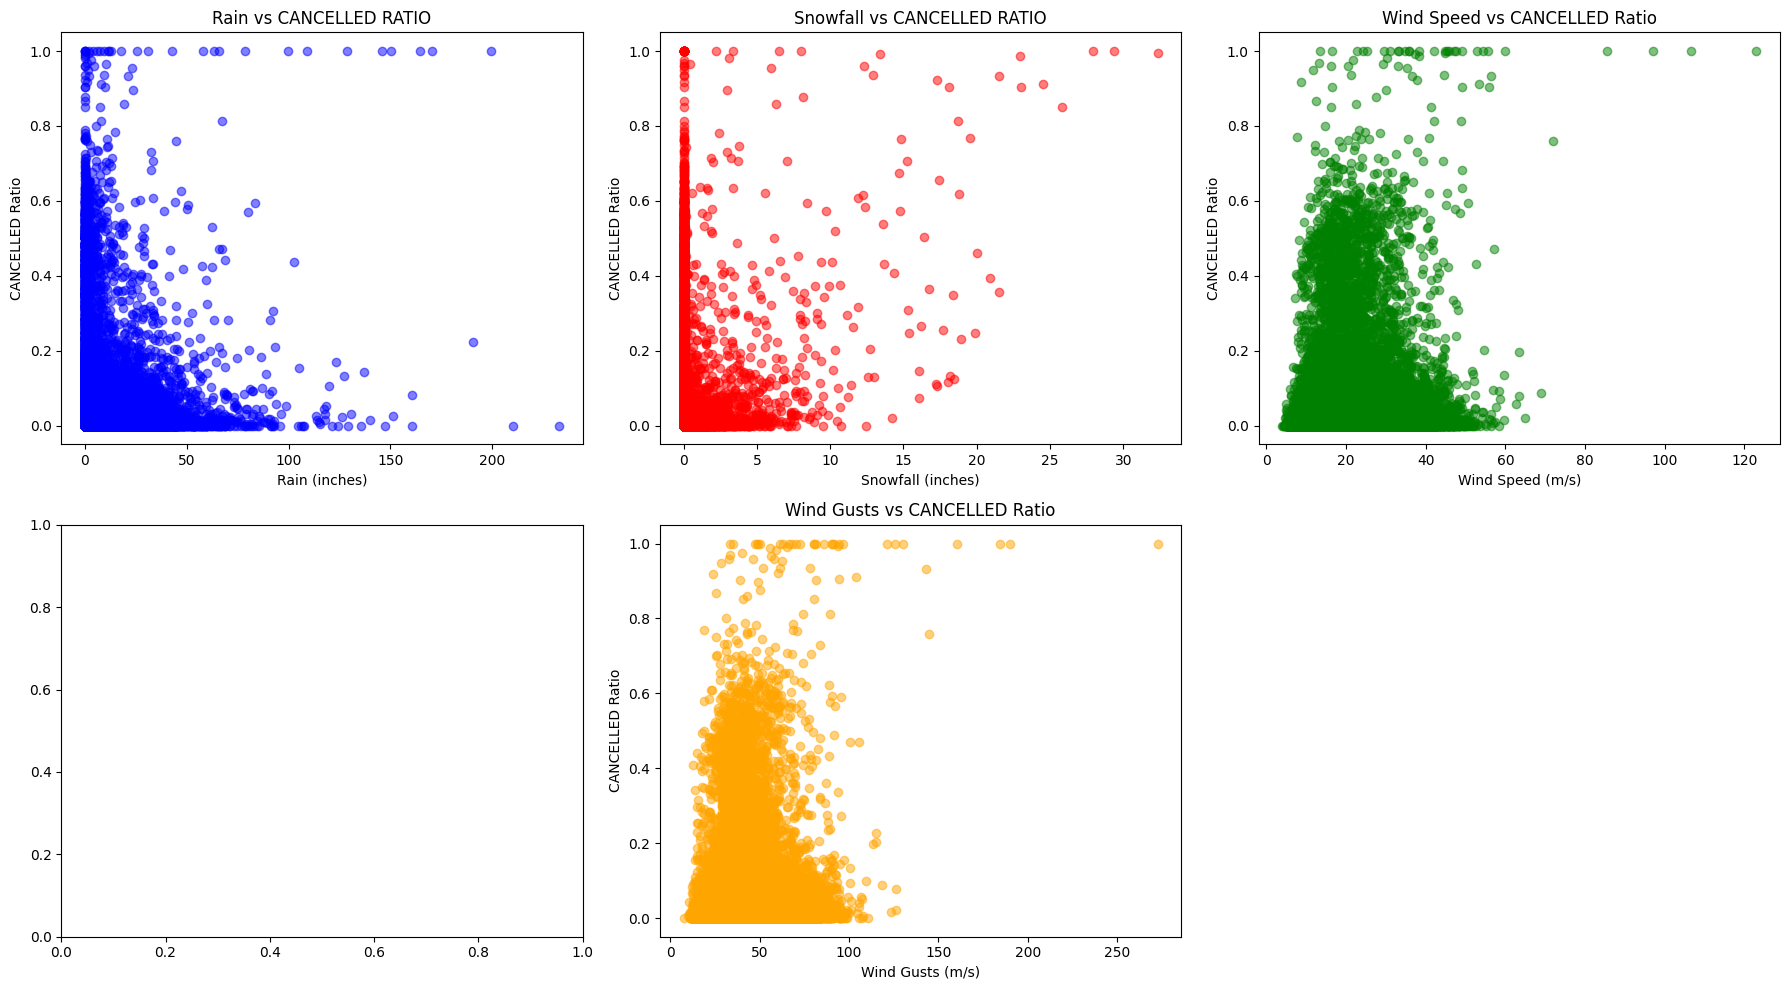

In [83]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes[0, 0].scatter(airport_hist_weather_daily_data_cancelled['rain_sum'], airport_hist_weather_daily_data_cancelled['cancellation_ratio'], color='blue', alpha=0.5)
axes[0, 0].set_title('Rain vs CANCELLED RATIO')
axes[0, 0].set_xlabel('Rain (inches)')
axes[0, 0].set_ylabel('CANCELLED Ratio')

axes[0, 1].scatter(airport_hist_weather_daily_data_cancelled['snowfall_sum'], airport_hist_weather_daily_data_cancelled['cancellation_ratio'], color='red', alpha=0.5)
axes[0, 1].set_title('Snowfall vs CANCELLED RATIO')
axes[0, 1].set_xlabel('Snowfall (inches)')
axes[0, 1].set_ylabel('CANCELLED Ratio')

axes[0, 2].scatter(airport_hist_weather_daily_data_cancelled['wind_speed_10m_max'], airport_hist_weather_daily_data_cancelled['cancellation_ratio'], color='green', alpha=0.5)
axes[0, 2].set_title('Wind Speed vs CANCELLED Ratio')
axes[0, 2].set_xlabel('Wind Speed (m/s)')
axes[0, 2].set_ylabel('CANCELLED Ratio')


axes[1, 1].scatter(airport_hist_weather_daily_data_cancelled['wind_gusts_10m_max'], airport_hist_weather_daily_data_cancelled['cancellation_ratio'], color='orange', alpha=0.5)
axes[1, 1].set_title('Wind Gusts vs CANCELLED Ratio')
axes[1, 1].set_xlabel('Wind Gusts (m/s)')
axes[1, 1].set_ylabel('CANCELLED Ratio')

fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()


C:\Users\youss\AppData\Local\Temp\ipykernel_5508\3143767629.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = airport_hist_weather_daily_data_cancelled.groupby(['airport_code', cancel_bins])['cancellation_ratio'].mean().unstack()


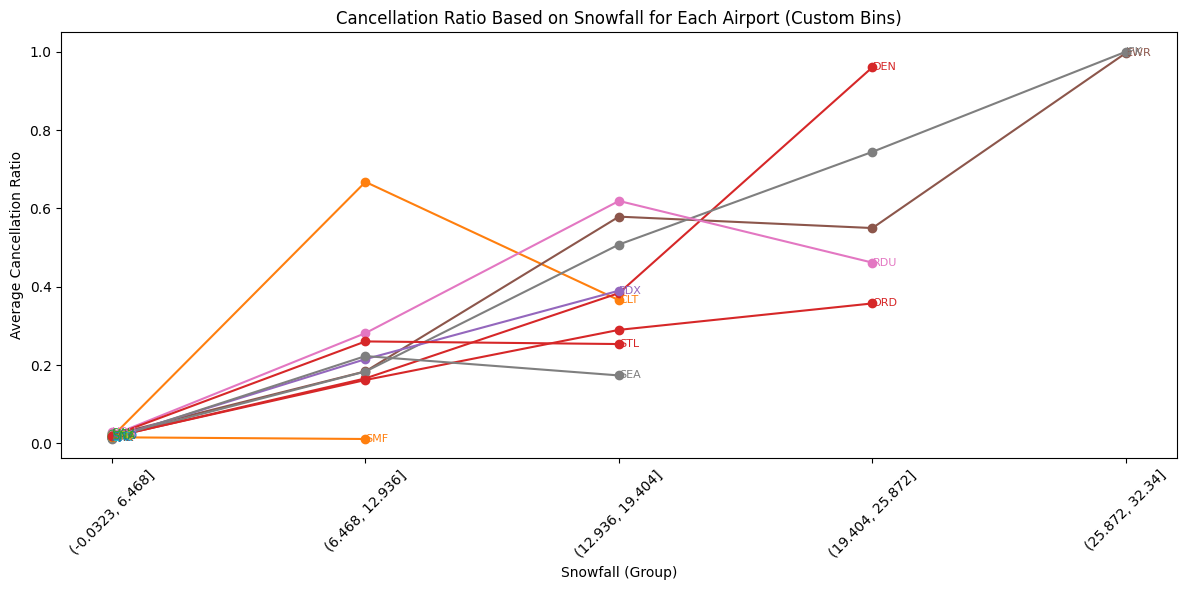

In [87]:


cancel_bins = pd.cut(airport_hist_weather_daily_data_cancelled['snowfall_sum'], bins=5)

grouped_data = airport_hist_weather_daily_data_cancelled.groupby(['airport_code', cancel_bins])['cancellation_ratio'].mean().unstack()
grouped_data.columns = grouped_data.columns.astype(str)


plt.figure(figsize=(12, 6))

for airport in grouped_data.index:
    plt.plot(grouped_data.columns.astype(str), grouped_data.loc[airport], marker='o', label=airport)
    
    last_valid_index = grouped_data.loc[airport].last_valid_index()
    
    if last_valid_index is not None:
        plt.text(last_valid_index, grouped_data.loc[airport].loc[last_valid_index], airport,
                 fontsize=8, color=plt.gca().lines[-1].get_color(),
                 verticalalignment='center', horizontalalignment='left')

plt.title('Cancellation Ratio Based on Snowfall for Each Airport (Custom Bins)')
plt.xlabel('Snowfall (Group)')
plt.ylabel('Average Cancellation Ratio')
plt.xticks(rotation=45)

plt.subplots_adjust(right=0.85)

plt.tight_layout()
plt.show()

C:\Users\youss\AppData\Local\Temp\ipykernel_5508\1239405220.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['cancellation_ratio'].mean()


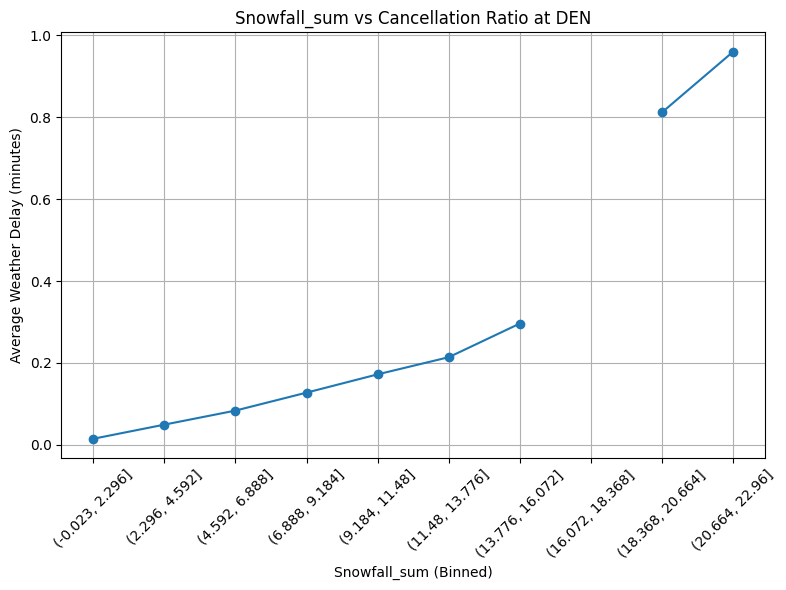

C:\Users\youss\AppData\Local\Temp\ipykernel_5508\1239405220.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['cancellation_ratio'].mean()


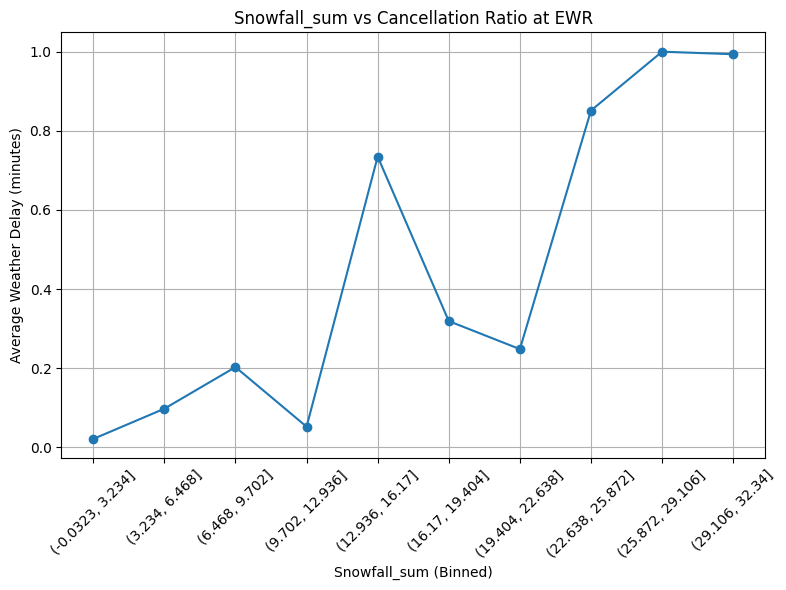

C:\Users\youss\AppData\Local\Temp\ipykernel_5508\1239405220.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['cancellation_ratio'].mean()


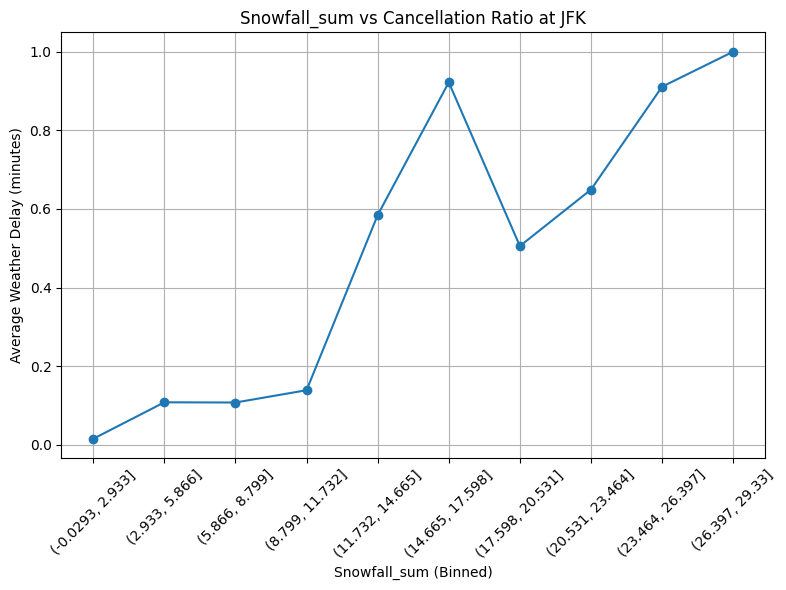

C:\Users\youss\AppData\Local\Temp\ipykernel_5508\1239405220.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['cancellation_ratio'].mean()


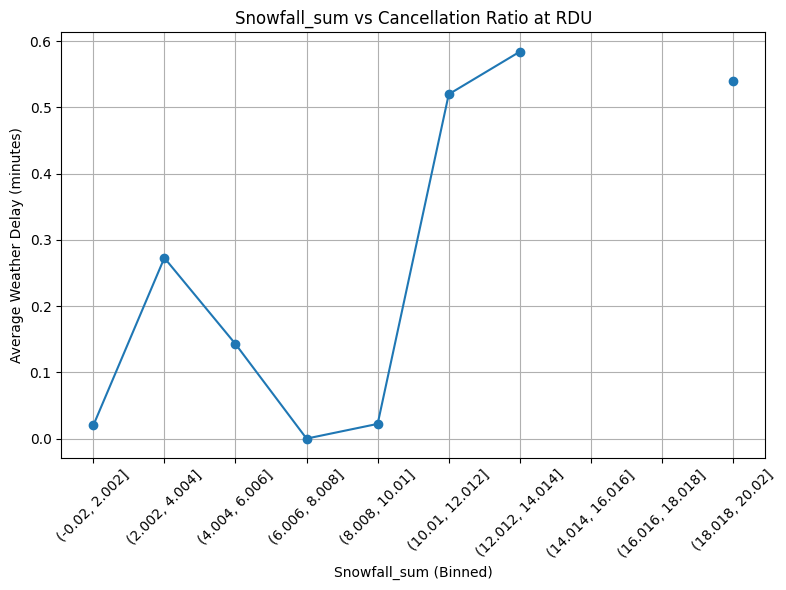

C:\Users\youss\AppData\Local\Temp\ipykernel_5508\1239405220.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = airport_data.groupby(binned_data)['cancellation_ratio'].mean()


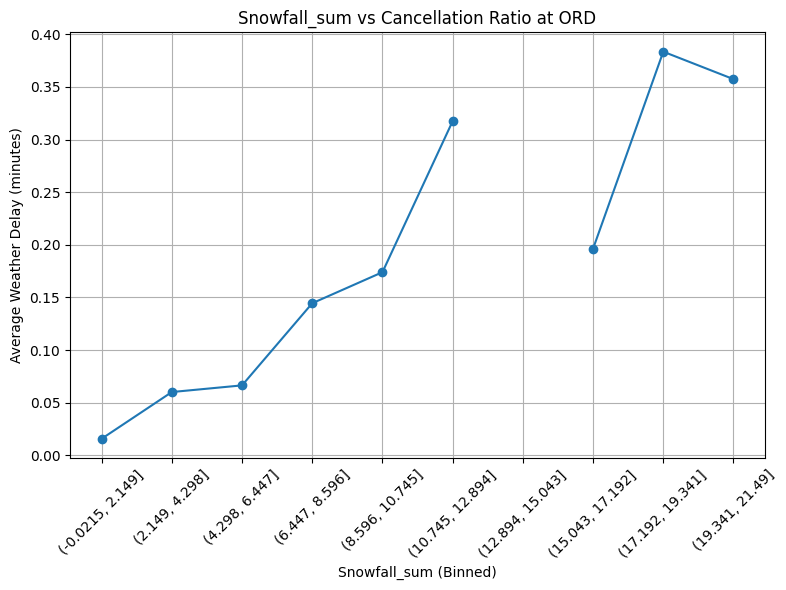

In [96]:
airports = ['DEN', 'EWR', 'JFK', 'RDU', 'ORD']
filtered_data = airport_hist_weather_daily_data_cancelled[airport_hist_weather_daily_data_cancelled['airport_code'].isin(airports)]

weather_factors = ['snowfall_sum']

bins = 10

for airport in airports:
    airport_data = filtered_data[filtered_data['airport_code'] == airport]
    
    for factor in weather_factors:
        binned_data = pd.cut(airport_data[factor], bins=bins)
        avg_delay = airport_data.groupby(binned_data)['cancellation_ratio'].mean()
        
        plt.figure(figsize=(8, 6))
        plt.plot(avg_delay.index.astype(str), avg_delay, marker='o')
        plt.title(f'{factor.capitalize()} vs Cancellation Ratio at {airport}')
        plt.xlabel(f'{factor.capitalize()} (Binned)')
        plt.ylabel('Average Weather Delay (minutes)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

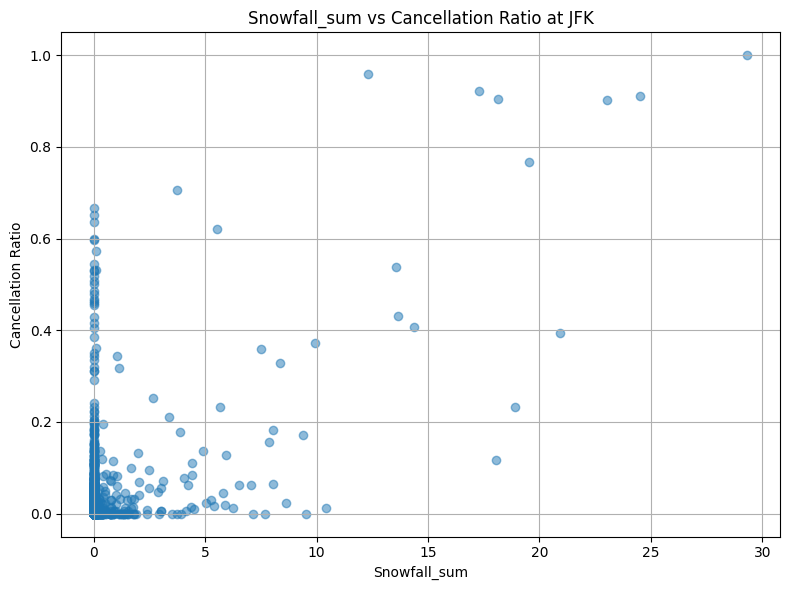

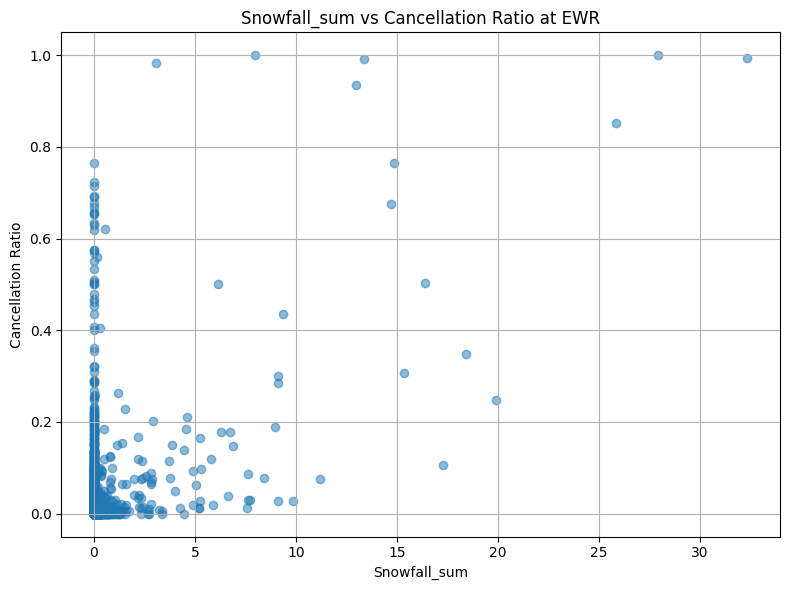

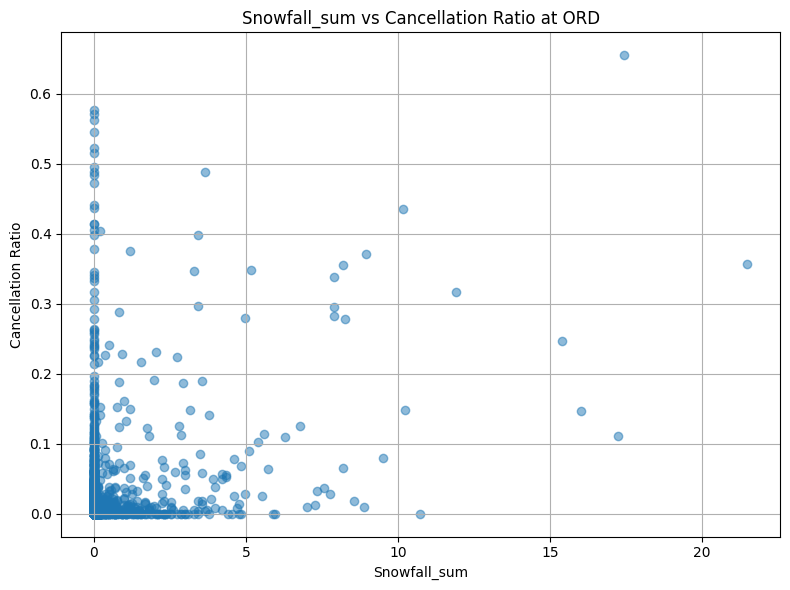

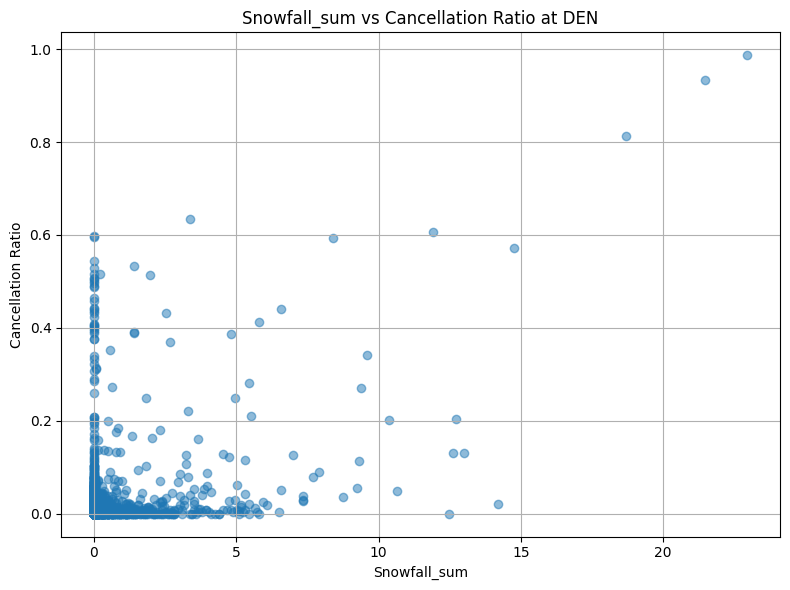

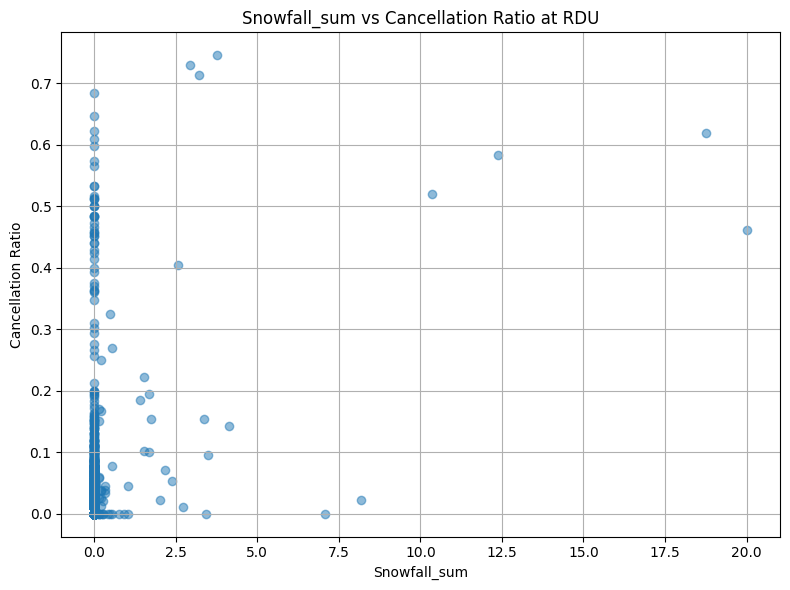

In [97]:
airports = ['JFK', 'EWR', 'ORD','DEN', 'RDU']
filtered_data = airport_hist_weather_daily_data_cancelled[airport_hist_weather_daily_data_cancelled['airport_code'].isin(airports)]

weather_factors = ['snowfall_sum']

for airport in airports:
    airport_data = filtered_data[filtered_data['airport_code'] == airport]
    
    for factor in weather_factors:
        plt.figure(figsize=(8, 6))
        plt.scatter(airport_data[factor], airport_data['cancellation_ratio'], alpha=0.5)
        plt.title(f'{factor.capitalize()} vs Cancellation Ratio at {airport}')
        plt.xlabel(f'{factor.capitalize()}')
        plt.ylabel('Cancellation Ratio')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

C:\Users\youss\AppData\Local\Temp\ipykernel_5508\4221386860.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = airport_hist_weather_daily_data_cancelled.groupby(['airport_code', cancel_bins_gust])['cancellation_ratio'].mean().unstack()


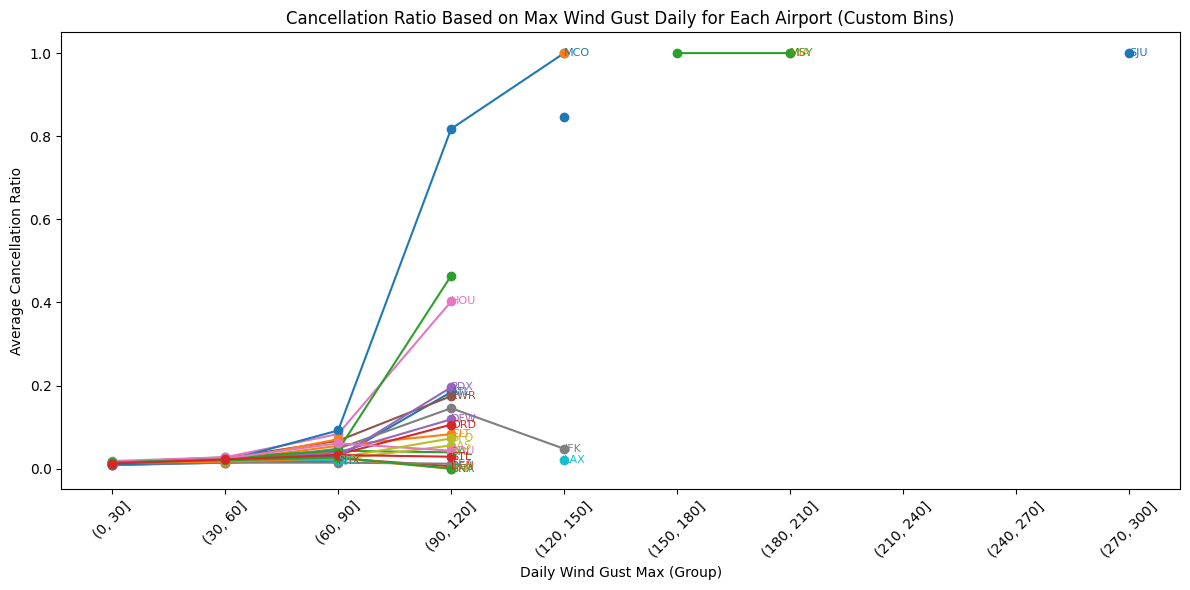

In [90]:
custom_bins_gust = [0, 30, 60, 90, 120, 150, 180, 210,240,270,300] 


cancel_bins_gust = pd.cut(airport_hist_weather_daily_data_cancelled['wind_gusts_10m_max'], bins=custom_bins_gust)

grouped_data = airport_hist_weather_daily_data_cancelled.groupby(['airport_code', cancel_bins_gust])['cancellation_ratio'].mean().unstack()
grouped_data.columns = grouped_data.columns.astype(str)


plt.figure(figsize=(12, 6))

for airport in grouped_data.index:
    plt.plot(grouped_data.columns.astype(str), grouped_data.loc[airport], marker='o', label=airport)
    
    last_valid_index = grouped_data.loc[airport].last_valid_index()
    
    if last_valid_index is not None:
        plt.text(last_valid_index, grouped_data.loc[airport].loc[last_valid_index], airport,
                 fontsize=8, color=plt.gca().lines[-1].get_color(),
                 verticalalignment='center', horizontalalignment='left')

plt.title('Cancellation Ratio Based on Max Wind Gust Daily for Each Airport (Custom Bins)')
plt.xlabel('Daily Wind Gust Max (Group)')
plt.ylabel('Average Cancellation Ratio')
plt.xticks(rotation=45)

plt.subplots_adjust(right=0.85)

plt.tight_layout()
plt.show()

C:\Users\youss\AppData\Local\Temp\ipykernel_5508\3061240789.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = airport_hist_weather_daily_data_cancelled.groupby(['airport_code', cancel_bins_wind])['cancellation_ratio'].mean().unstack()


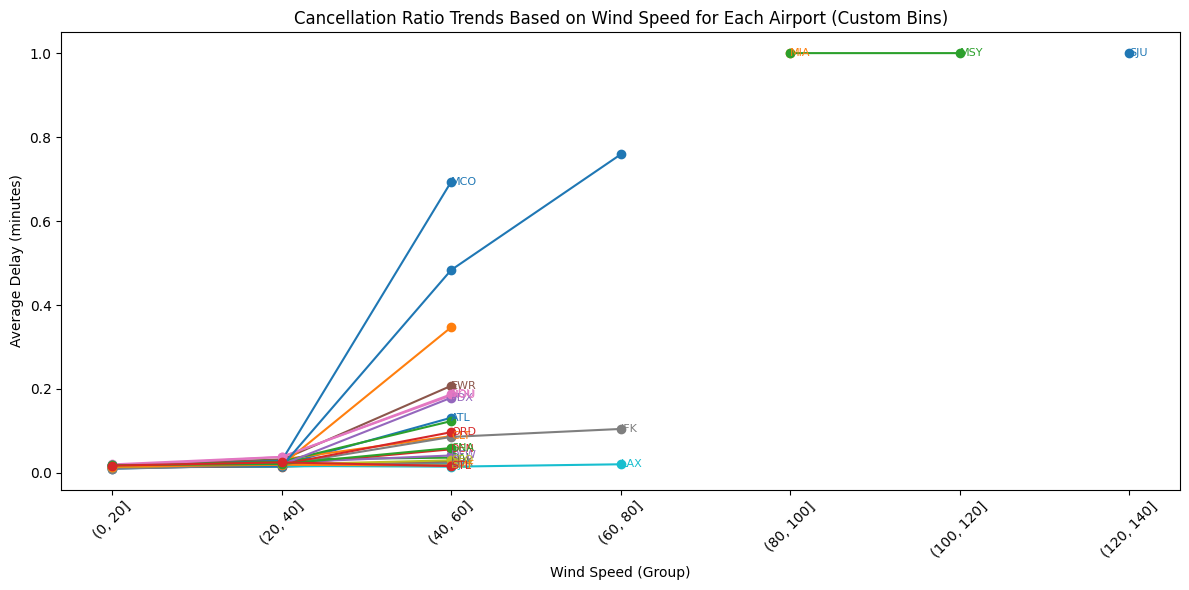

In [94]:
custom_bins_wind = [0, 20, 40, 60, 80, 100, 120, 140]  
cancel_bins_wind = pd.cut(airport_hist_weather_daily_data_cancelled['wind_speed_10m_max'], bins=custom_bins_wind)

grouped_data = airport_hist_weather_daily_data_cancelled.groupby(['airport_code', cancel_bins_wind])['cancellation_ratio'].mean().unstack()
grouped_data.columns = grouped_data.columns.astype(str)


plt.figure(figsize=(12, 6))

for airport in grouped_data.index:
    plt.plot(grouped_data.columns.astype(str), grouped_data.loc[airport], marker='o', label=airport)
    
    last_valid_index = grouped_data.loc[airport].last_valid_index()
    
    if last_valid_index is not None:
        plt.text(last_valid_index, grouped_data.loc[airport].loc[last_valid_index], airport,
                 fontsize=8, color=plt.gca().lines[-1].get_color(),
                 verticalalignment='center', horizontalalignment='left')

plt.title('Cancellation Ratio Trends Based on Wind Speed for Each Airport (Custom Bins)')
plt.xlabel('Wind Speed (Group)')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)


plt.subplots_adjust(right=0.85)

plt.tight_layout()
plt.show()